In [1]:
import librosa
import librosa.display
import numpy as np 
import os
import sys
import parselmouth
import glob
import pyloudnorm as pyln
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Step 1: Feature Extraction

In [228]:
def extract_audio_features(directory):
    # Dictionary to store features for each file
    audio_features = {}

    # Use glob to find all MP3 files in the directory
    mp3_files = glob.glob(os.path.join(directory, "*.mp3"))

    # Iterate over all MP3 files
    for file_path in mp3_files:
        filename = os.path.basename(file_path)

        # Load the audio file
        sound = parselmouth.Sound(file_path)
        y, sr = librosa.load(file_path)

        # Extract pitch-related features
        pitch = sound.to_pitch()
        pitch_values = pitch.selected_array['frequency']
        pitch_values = pitch_values[~np.isnan(pitch_values) & (pitch_values != 0)]
        
        # Check if there are valid pitch values
        if len(pitch_values) > 0:
            f0_mean = np.mean(pitch_values)
            f0_median = np.median(pitch_values)
            f0_std = np.std(pitch_values)
            f0_5th_percentile = np.percentile(pitch_values, 5)
            f0_95th_percentile = np.percentile(pitch_values, 95)
        else:
            # If no valid pitch values, set features to NaN
            f0_mean = f0_median = f0_std = f0_5th_percentile = f0_95th_percentile = np.nan


        # Extract intensity
        intensity = sound.to_intensity()

        # Extract duration
        duration = sound.get_total_duration()

        # Extract STFT KEI
        stft = sound.to_spectrogram()
        stft_array = np.array(stft.values)
        stft_kei_mean = np.nanmean(stft_array)
        stft_kei_median = np.nanmedian(stft_array)
        stft_kei_std = np.nanstd(stft_array)

        # Detect onsets
        onset_env = librosa.onset.onset_strength(y=y, sr=sr)
        onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr, hop_length=129)

        # Estimate tempo
        tempo = librosa.feature.rhythm.tempo(y=y, sr=sr)

        # Extract formants
        formants = sound.to_formant_burg()

        # Extract MFCCs
        mfcc_features = librosa.feature.mfcc(y=y, sr=sr)

        # Store the features in the dictionary
        audio_features[filename] = {
            "f0_mean": f0_mean,
            "f0_median": f0_median,
            "f0_std": f0_std,
            "f0_5th_percentile": f0_5th_percentile,
            "f0_95th_percentile": f0_95th_percentile,
            "intensity_mean": np.nanmean(intensity.values[0]),
            "duration": duration,
            "stft_kei_mean": stft_kei_mean,
            "stft_kei_median": stft_kei_median,
            "stft_kei_std": stft_kei_std,
            "num_onsets": len(onset_frames),
            "words_per_sec": len(onset_frames) / duration,
            "tempo": tempo,
            "formants": formants,
            "mfcc_features": np.nanmean(mfcc_features)
        }
        print("File Done: ",filename)

    return audio_features

# Specify the directory containing the audio files
directory = "cv-valid-train"

# Extract features for all audio files in the directory
all_audio_features = extract_audio_features(directory)

# Example: Print features for the first file
for filename, features in all_audio_features.items():
    print("File:", filename)
    for feature_name, value in features.items():
        print(f"{feature_name}: {value}")
    print("\n")


File Done:  sample-000000.mp3
File Done:  sample-000001.mp3
File Done:  sample-000002.mp3
File Done:  sample-000003.mp3
File Done:  sample-000004.mp3
File Done:  sample-000005.mp3
File Done:  sample-000006.mp3
File Done:  sample-000007.mp3
File Done:  sample-000008.mp3
File Done:  sample-000009.mp3
File Done:  sample-000010.mp3
File Done:  sample-000011.mp3
File Done:  sample-000012.mp3
File Done:  sample-000013.mp3
File Done:  sample-000014.mp3
File Done:  sample-000015.mp3
File Done:  sample-000016.mp3
File Done:  sample-000017.mp3
File Done:  sample-000018.mp3
File Done:  sample-000019.mp3
File Done:  sample-000020.mp3
File Done:  sample-000021.mp3
File Done:  sample-000022.mp3
File Done:  sample-000023.mp3
File Done:  sample-000024.mp3
File Done:  sample-000025.mp3
File Done:  sample-000026.mp3
File Done:  sample-000027.mp3
File Done:  sample-000028.mp3
File Done:  sample-000029.mp3
File Done:  sample-000030.mp3
File Done:  sample-000031.mp3
File Done:  sample-000032.mp3
File Done:

File Done:  sample-000274.mp3
File Done:  sample-000275.mp3
File Done:  sample-000276.mp3
File Done:  sample-000277.mp3
File Done:  sample-000278.mp3
File Done:  sample-000279.mp3
File Done:  sample-000280.mp3
File Done:  sample-000281.mp3
File Done:  sample-000282.mp3
File Done:  sample-000283.mp3
File Done:  sample-000284.mp3
File Done:  sample-000285.mp3
File Done:  sample-000286.mp3
File Done:  sample-000287.mp3
File Done:  sample-000288.mp3
File Done:  sample-000289.mp3
File Done:  sample-000290.mp3
File Done:  sample-000291.mp3
File Done:  sample-000292.mp3
File Done:  sample-000293.mp3
File Done:  sample-000294.mp3
File Done:  sample-000295.mp3
File Done:  sample-000296.mp3
File Done:  sample-000297.mp3
File Done:  sample-000298.mp3
File Done:  sample-000299.mp3
File Done:  sample-000300.mp3
File Done:  sample-000301.mp3
File Done:  sample-000302.mp3
File Done:  sample-000303.mp3
File Done:  sample-000304.mp3
File Done:  sample-000305.mp3
File Done:  sample-000306.mp3
File Done:

File Done:  sample-000548.mp3
File Done:  sample-000549.mp3
File Done:  sample-000550.mp3
File Done:  sample-000551.mp3
File Done:  sample-000552.mp3
File Done:  sample-000553.mp3
File Done:  sample-000554.mp3
File Done:  sample-000555.mp3
File Done:  sample-000556.mp3
File Done:  sample-000557.mp3
File Done:  sample-000558.mp3
File Done:  sample-000559.mp3
File Done:  sample-000560.mp3
File Done:  sample-000561.mp3
File Done:  sample-000562.mp3
File Done:  sample-000563.mp3
File Done:  sample-000564.mp3
File Done:  sample-000565.mp3
File Done:  sample-000566.mp3
File Done:  sample-000567.mp3
File Done:  sample-000568.mp3
File Done:  sample-000569.mp3
File Done:  sample-000570.mp3
File Done:  sample-000571.mp3
File Done:  sample-000572.mp3
File Done:  sample-000573.mp3
File Done:  sample-000574.mp3
File Done:  sample-000575.mp3
File Done:  sample-000576.mp3
File Done:  sample-000577.mp3
File Done:  sample-000578.mp3
File Done:  sample-000579.mp3
File Done:  sample-000580.mp3
File Done:

File Done:  sample-000822.mp3
File Done:  sample-000823.mp3
File Done:  sample-000824.mp3
File Done:  sample-000825.mp3
File Done:  sample-000826.mp3
File Done:  sample-000827.mp3
File Done:  sample-000828.mp3
File Done:  sample-000829.mp3
File Done:  sample-000830.mp3
File Done:  sample-000831.mp3
File Done:  sample-000832.mp3
File Done:  sample-000833.mp3
File Done:  sample-000834.mp3
File Done:  sample-000835.mp3
File Done:  sample-000836.mp3
File Done:  sample-000837.mp3
File Done:  sample-000838.mp3
File Done:  sample-000839.mp3
File Done:  sample-000840.mp3
File Done:  sample-000841.mp3
File Done:  sample-000842.mp3
File Done:  sample-000843.mp3
File Done:  sample-000844.mp3
File Done:  sample-000845.mp3
File Done:  sample-000846.mp3
File Done:  sample-000847.mp3
File Done:  sample-000848.mp3
File Done:  sample-000849.mp3
File Done:  sample-000850.mp3
File Done:  sample-000851.mp3
File Done:  sample-000852.mp3
File Done:  sample-000853.mp3
File Done:  sample-000854.mp3
File Done:

File Done:  sample-001096.mp3
File Done:  sample-001097.mp3
File Done:  sample-001098.mp3
File Done:  sample-001099.mp3
File Done:  sample-001100.mp3
File Done:  sample-001101.mp3
File Done:  sample-001102.mp3
File Done:  sample-001103.mp3
File Done:  sample-001104.mp3
File Done:  sample-001105.mp3
File Done:  sample-001106.mp3
File Done:  sample-001107.mp3
File Done:  sample-001108.mp3
File Done:  sample-001109.mp3
File Done:  sample-001110.mp3
File Done:  sample-001111.mp3
File Done:  sample-001112.mp3
File Done:  sample-001113.mp3
File Done:  sample-001114.mp3
File Done:  sample-001115.mp3
File Done:  sample-001116.mp3
File Done:  sample-001117.mp3
File Done:  sample-001118.mp3
File Done:  sample-001119.mp3
File Done:  sample-001120.mp3
File Done:  sample-001121.mp3
File Done:  sample-001122.mp3
File Done:  sample-001123.mp3
File Done:  sample-001124.mp3
File Done:  sample-001125.mp3
File Done:  sample-001126.mp3
File Done:  sample-001127.mp3
File Done:  sample-001128.mp3
File Done:

File Done:  sample-001370.mp3
File Done:  sample-001371.mp3
File Done:  sample-001372.mp3
File Done:  sample-001373.mp3
File Done:  sample-001374.mp3
File Done:  sample-001375.mp3
File Done:  sample-001376.mp3
File Done:  sample-001377.mp3
File Done:  sample-001378.mp3
File Done:  sample-001379.mp3
File Done:  sample-001380.mp3
File Done:  sample-001381.mp3
File Done:  sample-001382.mp3
File Done:  sample-001383.mp3
File Done:  sample-001384.mp3
File Done:  sample-001385.mp3
File Done:  sample-001386.mp3
File Done:  sample-001387.mp3
File Done:  sample-001388.mp3
File Done:  sample-001389.mp3
File Done:  sample-001390.mp3
File Done:  sample-001391.mp3
File Done:  sample-001392.mp3
File Done:  sample-001393.mp3
File Done:  sample-001394.mp3
File Done:  sample-001395.mp3
File Done:  sample-001396.mp3
File Done:  sample-001397.mp3
File Done:  sample-001398.mp3
File Done:  sample-001399.mp3
File Done:  sample-001400.mp3
File Done:  sample-001401.mp3
File Done:  sample-001402.mp3
File Done:

File Done:  sample-001644.mp3
File Done:  sample-001645.mp3
File Done:  sample-001646.mp3
File Done:  sample-001647.mp3
File Done:  sample-001648.mp3
File Done:  sample-001649.mp3
File Done:  sample-001650.mp3
File Done:  sample-001651.mp3
File Done:  sample-001652.mp3
File Done:  sample-001653.mp3
File Done:  sample-001654.mp3
File Done:  sample-001655.mp3
File Done:  sample-001656.mp3
File Done:  sample-001657.mp3
File Done:  sample-001658.mp3
File Done:  sample-001659.mp3
File Done:  sample-001660.mp3
File Done:  sample-001661.mp3
File Done:  sample-001662.mp3
File Done:  sample-001663.mp3
File Done:  sample-001664.mp3
File Done:  sample-001665.mp3
File Done:  sample-001666.mp3
File Done:  sample-001667.mp3
File Done:  sample-001668.mp3
File Done:  sample-001669.mp3
File Done:  sample-001670.mp3
File Done:  sample-001671.mp3
File Done:  sample-001672.mp3
File Done:  sample-001673.mp3
File Done:  sample-001674.mp3
File Done:  sample-001675.mp3
File Done:  sample-001676.mp3
File Done:

File Done:  sample-001918.mp3
File Done:  sample-001919.mp3
File Done:  sample-001920.mp3
File Done:  sample-001921.mp3
File Done:  sample-001922.mp3
File Done:  sample-001923.mp3
File Done:  sample-001924.mp3
File Done:  sample-001925.mp3
File Done:  sample-001926.mp3
File Done:  sample-001927.mp3
File Done:  sample-001928.mp3
File Done:  sample-001929.mp3
File Done:  sample-001930.mp3
File Done:  sample-001931.mp3
File Done:  sample-001932.mp3
File Done:  sample-001933.mp3
File Done:  sample-001934.mp3
File Done:  sample-001935.mp3
File Done:  sample-001936.mp3
File Done:  sample-001937.mp3
File Done:  sample-001938.mp3
File Done:  sample-001939.mp3
File Done:  sample-001940.mp3
File Done:  sample-001941.mp3
File Done:  sample-001942.mp3
File Done:  sample-001943.mp3
File Done:  sample-001944.mp3
File Done:  sample-001945.mp3
File Done:  sample-001946.mp3
File Done:  sample-001947.mp3
File Done:  sample-001948.mp3
File Done:  sample-001949.mp3
File Done:  sample-001950.mp3
File Done:

File Done:  sample-002192.mp3
File Done:  sample-002193.mp3
File Done:  sample-002194.mp3
File Done:  sample-002195.mp3
File Done:  sample-002196.mp3
File Done:  sample-002197.mp3
File Done:  sample-002198.mp3
File Done:  sample-002199.mp3
File Done:  sample-002200.mp3
File Done:  sample-002201.mp3
File Done:  sample-002202.mp3
File Done:  sample-002203.mp3
File Done:  sample-002204.mp3
File Done:  sample-002205.mp3
File Done:  sample-002206.mp3
File Done:  sample-002207.mp3
File Done:  sample-002208.mp3
File Done:  sample-002209.mp3
File Done:  sample-002210.mp3
File Done:  sample-002211.mp3
File Done:  sample-002212.mp3
File Done:  sample-002213.mp3
File Done:  sample-002214.mp3
File Done:  sample-002215.mp3
File Done:  sample-002216.mp3
File Done:  sample-002217.mp3
File Done:  sample-002218.mp3
File Done:  sample-002219.mp3
File Done:  sample-002220.mp3
File Done:  sample-002221.mp3
File Done:  sample-002222.mp3
File Done:  sample-002223.mp3
File Done:  sample-002224.mp3
File Done:

File Done:  sample-002466.mp3
File Done:  sample-002467.mp3
File Done:  sample-002468.mp3
File Done:  sample-002469.mp3
File Done:  sample-002470.mp3
File Done:  sample-002471.mp3
File Done:  sample-002472.mp3
File Done:  sample-002473.mp3
File Done:  sample-002474.mp3
File Done:  sample-002475.mp3
File Done:  sample-002476.mp3
File Done:  sample-002477.mp3
File Done:  sample-002478.mp3
File Done:  sample-002479.mp3
File Done:  sample-002480.mp3
File Done:  sample-002481.mp3
File Done:  sample-002482.mp3
File Done:  sample-002483.mp3
File Done:  sample-002484.mp3
File Done:  sample-002485.mp3
File Done:  sample-002486.mp3
File Done:  sample-002487.mp3
File Done:  sample-002488.mp3
File Done:  sample-002489.mp3
File Done:  sample-002490.mp3
File Done:  sample-002491.mp3
File Done:  sample-002492.mp3
File Done:  sample-002493.mp3
File Done:  sample-002494.mp3
File Done:  sample-002495.mp3
File Done:  sample-002496.mp3
File Done:  sample-002497.mp3
File Done:  sample-002498.mp3
File Done:

File Done:  sample-002740.mp3
File Done:  sample-002741.mp3
File Done:  sample-002742.mp3
File Done:  sample-002743.mp3
File Done:  sample-002744.mp3
File Done:  sample-002745.mp3
File Done:  sample-002746.mp3
File Done:  sample-002747.mp3
File Done:  sample-002748.mp3
File Done:  sample-002749.mp3
File Done:  sample-002750.mp3
File Done:  sample-002751.mp3
File Done:  sample-002752.mp3
File Done:  sample-002753.mp3
File Done:  sample-002754.mp3
File Done:  sample-002755.mp3
File Done:  sample-002756.mp3
File Done:  sample-002757.mp3
File Done:  sample-002758.mp3
File Done:  sample-002759.mp3
File Done:  sample-002760.mp3
File Done:  sample-002761.mp3
File Done:  sample-002762.mp3
File Done:  sample-002763.mp3
File Done:  sample-002764.mp3
File Done:  sample-002765.mp3
File Done:  sample-002766.mp3
File Done:  sample-002767.mp3
File Done:  sample-002768.mp3
File Done:  sample-002769.mp3
File Done:  sample-002770.mp3
File Done:  sample-002771.mp3
File Done:  sample-002772.mp3
File Done:

File Done:  sample-003014.mp3
File Done:  sample-003015.mp3
File Done:  sample-003016.mp3
File Done:  sample-003017.mp3
File Done:  sample-003018.mp3
File Done:  sample-003019.mp3
File Done:  sample-003020.mp3
File Done:  sample-003021.mp3
File Done:  sample-003022.mp3
File Done:  sample-003023.mp3
File Done:  sample-003024.mp3
File Done:  sample-003025.mp3
File Done:  sample-003026.mp3
File Done:  sample-003027.mp3
File Done:  sample-003028.mp3
File Done:  sample-003029.mp3
File Done:  sample-003030.mp3
File Done:  sample-003031.mp3
File Done:  sample-003032.mp3
File Done:  sample-003033.mp3
File Done:  sample-003034.mp3
File Done:  sample-003035.mp3
File Done:  sample-003036.mp3
File Done:  sample-003037.mp3
File Done:  sample-003038.mp3
File Done:  sample-003039.mp3
File Done:  sample-003040.mp3
File Done:  sample-003041.mp3
File Done:  sample-003042.mp3
File Done:  sample-003043.mp3
File Done:  sample-003044.mp3
File Done:  sample-003045.mp3
File Done:  sample-003046.mp3
File Done:

File Done:  sample-003288.mp3
File Done:  sample-003289.mp3
File Done:  sample-003290.mp3
File Done:  sample-003291.mp3
File Done:  sample-003292.mp3
File Done:  sample-003293.mp3
File Done:  sample-003294.mp3
File Done:  sample-003295.mp3
File Done:  sample-003296.mp3
File Done:  sample-003297.mp3
File Done:  sample-003298.mp3
File Done:  sample-003299.mp3
File Done:  sample-003300.mp3
File Done:  sample-003301.mp3
File Done:  sample-003302.mp3
File Done:  sample-003303.mp3
File Done:  sample-003304.mp3
File Done:  sample-003305.mp3
File Done:  sample-003306.mp3
File Done:  sample-003307.mp3
File Done:  sample-003308.mp3
File Done:  sample-003309.mp3
File Done:  sample-003310.mp3
File Done:  sample-003311.mp3
File Done:  sample-003312.mp3
File Done:  sample-003313.mp3
File Done:  sample-003314.mp3
File Done:  sample-003315.mp3
File Done:  sample-003316.mp3
File Done:  sample-003317.mp3
File Done:  sample-003318.mp3
File Done:  sample-003319.mp3
File Done:  sample-003320.mp3
File Done:

File Done:  sample-003562.mp3
File Done:  sample-003563.mp3
File Done:  sample-003564.mp3
File Done:  sample-003565.mp3
File Done:  sample-003566.mp3
File Done:  sample-003567.mp3
File Done:  sample-003568.mp3
File Done:  sample-003569.mp3
File Done:  sample-003570.mp3
File Done:  sample-003571.mp3
File Done:  sample-003572.mp3
File Done:  sample-003573.mp3
File Done:  sample-003574.mp3
File Done:  sample-003575.mp3
File Done:  sample-003576.mp3
File Done:  sample-003577.mp3
File Done:  sample-003578.mp3
File Done:  sample-003579.mp3
File Done:  sample-003580.mp3
File Done:  sample-003581.mp3
File Done:  sample-003582.mp3
File Done:  sample-003583.mp3
File Done:  sample-003584.mp3
File Done:  sample-003585.mp3
File Done:  sample-003586.mp3
File Done:  sample-003587.mp3
File Done:  sample-003588.mp3
File Done:  sample-003589.mp3
File Done:  sample-003590.mp3
File Done:  sample-003591.mp3
File Done:  sample-003592.mp3
File Done:  sample-003593.mp3
File Done:  sample-003594.mp3
File Done:

File Done:  sample-003836.mp3
File Done:  sample-003837.mp3
File Done:  sample-003838.mp3
File Done:  sample-003839.mp3
File Done:  sample-003840.mp3
File Done:  sample-003841.mp3
File Done:  sample-003842.mp3
File Done:  sample-003843.mp3
File Done:  sample-003844.mp3
File Done:  sample-003845.mp3
File Done:  sample-003846.mp3
File Done:  sample-003847.mp3
File Done:  sample-003848.mp3
File Done:  sample-003849.mp3
File Done:  sample-003850.mp3
File Done:  sample-003851.mp3
File Done:  sample-003852.mp3
File Done:  sample-003853.mp3
File Done:  sample-003854.mp3
File Done:  sample-003855.mp3
File Done:  sample-003856.mp3
File Done:  sample-003857.mp3
File Done:  sample-003858.mp3
File Done:  sample-003859.mp3
File Done:  sample-003860.mp3
File Done:  sample-003861.mp3
File Done:  sample-003862.mp3
File Done:  sample-003863.mp3
File Done:  sample-003864.mp3
File Done:  sample-003865.mp3
File Done:  sample-003866.mp3
File Done:  sample-003867.mp3
File Done:  sample-003868.mp3
File Done:

File Done:  sample-004110.mp3
File Done:  sample-004111.mp3
File Done:  sample-004112.mp3
File Done:  sample-004113.mp3
File Done:  sample-004114.mp3
File Done:  sample-004115.mp3
File Done:  sample-004116.mp3
File Done:  sample-004117.mp3
File Done:  sample-004118.mp3
File Done:  sample-004119.mp3
File Done:  sample-004120.mp3
File Done:  sample-004121.mp3
File Done:  sample-004122.mp3
File Done:  sample-004123.mp3
File Done:  sample-004124.mp3
File Done:  sample-004125.mp3
File Done:  sample-004126.mp3
File Done:  sample-004127.mp3
File Done:  sample-004128.mp3
File Done:  sample-004129.mp3
File Done:  sample-004130.mp3
File Done:  sample-004131.mp3
File Done:  sample-004132.mp3
File Done:  sample-004133.mp3
File Done:  sample-004134.mp3
File Done:  sample-004135.mp3
File Done:  sample-004136.mp3
File Done:  sample-004137.mp3
File Done:  sample-004138.mp3
File Done:  sample-004139.mp3
File Done:  sample-004140.mp3
File Done:  sample-004141.mp3
File Done:  sample-004142.mp3
File Done:

File Done:  sample-004385.mp3
File Done:  sample-004386.mp3
File Done:  sample-004387.mp3
File Done:  sample-004388.mp3
File Done:  sample-004389.mp3
File Done:  sample-004390.mp3
File Done:  sample-004391.mp3
File Done:  sample-004392.mp3
File Done:  sample-004393.mp3
File Done:  sample-004394.mp3
File Done:  sample-004395.mp3
File Done:  sample-004396.mp3
File Done:  sample-004397.mp3
File Done:  sample-004398.mp3
File Done:  sample-004399.mp3
File Done:  sample-004400.mp3
File Done:  sample-004401.mp3
File Done:  sample-004402.mp3
File Done:  sample-004403.mp3
File Done:  sample-004404.mp3
File Done:  sample-004405.mp3
File Done:  sample-004406.mp3
File Done:  sample-004407.mp3
File Done:  sample-004408.mp3
File Done:  sample-004409.mp3
File Done:  sample-004410.mp3
File Done:  sample-004411.mp3
File Done:  sample-004412.mp3
File Done:  sample-004413.mp3
File Done:  sample-004414.mp3
File Done:  sample-004415.mp3
File Done:  sample-004416.mp3
File Done:  sample-004417.mp3
File Done:

File Done:  sample-004660.mp3
File Done:  sample-004661.mp3
File Done:  sample-004662.mp3
File Done:  sample-004663.mp3
File Done:  sample-004664.mp3
File Done:  sample-004665.mp3
File Done:  sample-004666.mp3
File Done:  sample-004667.mp3
File Done:  sample-004668.mp3
File Done:  sample-004669.mp3
File Done:  sample-004670.mp3
File Done:  sample-004671.mp3
File Done:  sample-004672.mp3
File Done:  sample-004673.mp3
File Done:  sample-004674.mp3
File Done:  sample-004675.mp3
File Done:  sample-004676.mp3
File Done:  sample-004677.mp3
File Done:  sample-004678.mp3
File Done:  sample-004679.mp3
File Done:  sample-004680.mp3
File Done:  sample-004681.mp3
File Done:  sample-004682.mp3
File Done:  sample-004683.mp3
File Done:  sample-004684.mp3
File Done:  sample-004685.mp3
File Done:  sample-004686.mp3
File Done:  sample-004687.mp3
File Done:  sample-004688.mp3
File Done:  sample-004689.mp3
File Done:  sample-004690.mp3
File Done:  sample-004691.mp3
File Done:  sample-004692.mp3
File Done:

File Done:  sample-004935.mp3
File Done:  sample-004936.mp3
File Done:  sample-004937.mp3
File Done:  sample-004938.mp3
File Done:  sample-004939.mp3
File Done:  sample-004940.mp3
File Done:  sample-004941.mp3
File Done:  sample-004942.mp3
File Done:  sample-004943.mp3
File Done:  sample-004944.mp3
File Done:  sample-004945.mp3
File Done:  sample-004946.mp3
File Done:  sample-004947.mp3
File Done:  sample-004948.mp3
File Done:  sample-004949.mp3
File Done:  sample-004950.mp3
File Done:  sample-004951.mp3
File Done:  sample-004952.mp3
File Done:  sample-004953.mp3
File Done:  sample-004954.mp3
File Done:  sample-004955.mp3
File Done:  sample-004956.mp3
File Done:  sample-004957.mp3
File Done:  sample-004958.mp3
File Done:  sample-004959.mp3
File Done:  sample-004960.mp3
File Done:  sample-004961.mp3
File Done:  sample-004962.mp3
File Done:  sample-004963.mp3
File Done:  sample-004964.mp3
File Done:  sample-004965.mp3
File Done:  sample-004966.mp3
File Done:  sample-004967.mp3
File Done:

File Done:  sample-005209.mp3
File Done:  sample-005210.mp3
File Done:  sample-005211.mp3
File Done:  sample-005212.mp3
File Done:  sample-005213.mp3
File Done:  sample-005214.mp3
File Done:  sample-005215.mp3
File Done:  sample-005216.mp3
File Done:  sample-005217.mp3
File Done:  sample-005218.mp3
File Done:  sample-005219.mp3
File Done:  sample-005220.mp3
File Done:  sample-005221.mp3
File Done:  sample-005222.mp3
File Done:  sample-005223.mp3
File Done:  sample-005224.mp3
File Done:  sample-005225.mp3
File Done:  sample-005226.mp3
File Done:  sample-005227.mp3
File Done:  sample-005228.mp3
File Done:  sample-005229.mp3
File Done:  sample-005230.mp3
File Done:  sample-005231.mp3
File Done:  sample-005232.mp3
File Done:  sample-005233.mp3
File Done:  sample-005234.mp3
File Done:  sample-005235.mp3
File Done:  sample-005236.mp3
File Done:  sample-005237.mp3
File Done:  sample-005238.mp3
File Done:  sample-005239.mp3
File Done:  sample-005240.mp3
File Done:  sample-005241.mp3
File Done:

File Done:  sample-005483.mp3
File Done:  sample-005484.mp3
File Done:  sample-005485.mp3
File Done:  sample-005486.mp3
File Done:  sample-005487.mp3
File Done:  sample-005488.mp3
File Done:  sample-005489.mp3
File Done:  sample-005490.mp3
File Done:  sample-005491.mp3
File Done:  sample-005492.mp3
File Done:  sample-005493.mp3
File Done:  sample-005494.mp3
File Done:  sample-005495.mp3
File Done:  sample-005496.mp3
File Done:  sample-005497.mp3
File Done:  sample-005498.mp3
File Done:  sample-005499.mp3
File Done:  sample-005500.mp3
File Done:  sample-005501.mp3
File Done:  sample-005502.mp3
File Done:  sample-005503.mp3
File Done:  sample-005504.mp3
File Done:  sample-005505.mp3
File Done:  sample-005506.mp3
File Done:  sample-005507.mp3
File Done:  sample-005508.mp3
File Done:  sample-005509.mp3
File Done:  sample-005510.mp3
File Done:  sample-005511.mp3
File Done:  sample-005512.mp3
File Done:  sample-005513.mp3
File Done:  sample-005514.mp3
File Done:  sample-005515.mp3
File Done:

File Done:  sample-005757.mp3
File Done:  sample-005758.mp3
File Done:  sample-005759.mp3
File Done:  sample-005760.mp3
File Done:  sample-005761.mp3
File Done:  sample-005762.mp3
File Done:  sample-005763.mp3
File Done:  sample-005764.mp3
File Done:  sample-005765.mp3
File Done:  sample-005766.mp3
File Done:  sample-005767.mp3
File Done:  sample-005768.mp3
File Done:  sample-005769.mp3
File Done:  sample-005770.mp3
File Done:  sample-005771.mp3
File Done:  sample-005772.mp3
File Done:  sample-005773.mp3
File Done:  sample-005774.mp3
File Done:  sample-005775.mp3
File Done:  sample-005776.mp3
File Done:  sample-005777.mp3
File Done:  sample-005778.mp3
File Done:  sample-005779.mp3
File Done:  sample-005780.mp3
File Done:  sample-005781.mp3
File Done:  sample-005782.mp3
File Done:  sample-005783.mp3
File Done:  sample-005784.mp3
File Done:  sample-005785.mp3
File Done:  sample-005786.mp3
File Done:  sample-005787.mp3
File Done:  sample-005788.mp3
File Done:  sample-005789.mp3
File Done:

File Done:  sample-006031.mp3
File Done:  sample-006032.mp3
File Done:  sample-006033.mp3
File Done:  sample-006034.mp3
File Done:  sample-006035.mp3
File Done:  sample-006036.mp3
File Done:  sample-006037.mp3
File Done:  sample-006038.mp3
File Done:  sample-006039.mp3
File Done:  sample-006040.mp3
File Done:  sample-006041.mp3
File Done:  sample-006042.mp3
File Done:  sample-006043.mp3
File Done:  sample-006044.mp3
File Done:  sample-006045.mp3
File Done:  sample-006046.mp3
File Done:  sample-006047.mp3
File Done:  sample-006048.mp3
File Done:  sample-006049.mp3
File Done:  sample-006050.mp3
File Done:  sample-006051.mp3
File Done:  sample-006052.mp3
File Done:  sample-006053.mp3
File Done:  sample-006054.mp3
File Done:  sample-006055.mp3
File Done:  sample-006056.mp3
File Done:  sample-006057.mp3
File Done:  sample-006058.mp3
File Done:  sample-006059.mp3
File Done:  sample-006060.mp3
File Done:  sample-006061.mp3
File Done:  sample-006062.mp3
File Done:  sample-006063.mp3
File Done:

File Done:  sample-006305.mp3
File Done:  sample-006306.mp3
File Done:  sample-006307.mp3
File Done:  sample-006308.mp3
File Done:  sample-006309.mp3
File Done:  sample-006310.mp3
File Done:  sample-006311.mp3
File Done:  sample-006312.mp3
File Done:  sample-006313.mp3
File Done:  sample-006314.mp3
File Done:  sample-006315.mp3
File Done:  sample-006316.mp3
File Done:  sample-006317.mp3
File Done:  sample-006318.mp3
File Done:  sample-006319.mp3
File Done:  sample-006320.mp3
File Done:  sample-006321.mp3
File Done:  sample-006322.mp3
File Done:  sample-006323.mp3
File Done:  sample-006324.mp3
File Done:  sample-006325.mp3
File Done:  sample-006326.mp3
File Done:  sample-006327.mp3
File Done:  sample-006328.mp3
File Done:  sample-006329.mp3
File Done:  sample-006330.mp3
File Done:  sample-006331.mp3
File Done:  sample-006332.mp3
File Done:  sample-006333.mp3
File Done:  sample-006334.mp3
File Done:  sample-006335.mp3
File Done:  sample-006336.mp3
File Done:  sample-006337.mp3
File Done:

File Done:  sample-006580.mp3
File Done:  sample-006581.mp3
File Done:  sample-006582.mp3
File Done:  sample-006583.mp3
File Done:  sample-006584.mp3
File Done:  sample-006585.mp3
File Done:  sample-006586.mp3
File Done:  sample-006587.mp3
File Done:  sample-006588.mp3
File Done:  sample-006589.mp3
File Done:  sample-006590.mp3
File Done:  sample-006591.mp3
File Done:  sample-006592.mp3
File Done:  sample-006593.mp3
File Done:  sample-006594.mp3
File Done:  sample-006595.mp3
File Done:  sample-006596.mp3
File Done:  sample-006597.mp3
File Done:  sample-006598.mp3
File Done:  sample-006599.mp3
File Done:  sample-006600.mp3
File Done:  sample-006601.mp3
File Done:  sample-006602.mp3
File Done:  sample-006603.mp3
File Done:  sample-006604.mp3
File Done:  sample-006605.mp3
File Done:  sample-006606.mp3
File Done:  sample-006607.mp3
File Done:  sample-006608.mp3
File Done:  sample-006609.mp3
File Done:  sample-006610.mp3
File Done:  sample-006611.mp3
File Done:  sample-006612.mp3
File Done:

File Done:  sample-006855.mp3
File Done:  sample-006856.mp3
File Done:  sample-006857.mp3
File Done:  sample-006858.mp3
File Done:  sample-006859.mp3
File Done:  sample-006860.mp3
File Done:  sample-006861.mp3
File Done:  sample-006862.mp3
File Done:  sample-006863.mp3
File Done:  sample-006864.mp3
File Done:  sample-006865.mp3
File Done:  sample-006866.mp3
File Done:  sample-006867.mp3
File Done:  sample-006868.mp3
File Done:  sample-006869.mp3
File Done:  sample-006870.mp3
File Done:  sample-006871.mp3
File Done:  sample-006872.mp3
File Done:  sample-006873.mp3
File Done:  sample-006874.mp3
File Done:  sample-006875.mp3
File Done:  sample-006876.mp3
File Done:  sample-006877.mp3
File Done:  sample-006878.mp3
File Done:  sample-006879.mp3
File Done:  sample-006880.mp3
File Done:  sample-006881.mp3
File Done:  sample-006882.mp3
File Done:  sample-006883.mp3
File Done:  sample-006884.mp3
File Done:  sample-006885.mp3
File Done:  sample-006886.mp3
File Done:  sample-006887.mp3
File Done:

File Done:  sample-007129.mp3
File Done:  sample-007130.mp3
File Done:  sample-007131.mp3
File Done:  sample-007132.mp3
File Done:  sample-007133.mp3
File Done:  sample-007134.mp3
File Done:  sample-007135.mp3
File Done:  sample-007136.mp3
File Done:  sample-007137.mp3
File Done:  sample-007138.mp3
File Done:  sample-007139.mp3
File Done:  sample-007140.mp3
File Done:  sample-007141.mp3
File Done:  sample-007142.mp3
File Done:  sample-007143.mp3
File Done:  sample-007144.mp3
File Done:  sample-007145.mp3
File Done:  sample-007146.mp3
File Done:  sample-007147.mp3
File Done:  sample-007148.mp3
File Done:  sample-007149.mp3
File Done:  sample-007150.mp3
File Done:  sample-007151.mp3
File Done:  sample-007152.mp3
File Done:  sample-007153.mp3
File Done:  sample-007154.mp3
File Done:  sample-007155.mp3
File Done:  sample-007156.mp3
File Done:  sample-007157.mp3
File Done:  sample-007158.mp3
File Done:  sample-007159.mp3
File Done:  sample-007160.mp3
File Done:  sample-007161.mp3
File Done:

File Done:  sample-007403.mp3
File Done:  sample-007404.mp3
File Done:  sample-007405.mp3
File Done:  sample-007406.mp3
File Done:  sample-007407.mp3
File Done:  sample-007408.mp3
File Done:  sample-007409.mp3
File Done:  sample-007410.mp3
File Done:  sample-007411.mp3
File Done:  sample-007412.mp3
File Done:  sample-007413.mp3
File Done:  sample-007414.mp3
File Done:  sample-007415.mp3
File Done:  sample-007416.mp3
File Done:  sample-007417.mp3
File Done:  sample-007418.mp3
File Done:  sample-007419.mp3
File Done:  sample-007420.mp3
File Done:  sample-007421.mp3
File Done:  sample-007422.mp3
File Done:  sample-007423.mp3
File Done:  sample-007424.mp3
File Done:  sample-007425.mp3
File Done:  sample-007426.mp3
File Done:  sample-007427.mp3
File Done:  sample-007428.mp3
File Done:  sample-007429.mp3
File Done:  sample-007430.mp3
File Done:  sample-007431.mp3
File Done:  sample-007432.mp3
File Done:  sample-007433.mp3
File Done:  sample-007434.mp3
File Done:  sample-007435.mp3
File Done:

File Done:  sample-007677.mp3
File Done:  sample-007678.mp3
File Done:  sample-007679.mp3
File Done:  sample-007680.mp3
File Done:  sample-007681.mp3
File Done:  sample-007682.mp3
File Done:  sample-007683.mp3
File Done:  sample-007684.mp3
File Done:  sample-007685.mp3
File Done:  sample-007686.mp3
File Done:  sample-007687.mp3
File Done:  sample-007688.mp3
File Done:  sample-007689.mp3
File Done:  sample-007690.mp3
File Done:  sample-007691.mp3
File Done:  sample-007692.mp3
File Done:  sample-007693.mp3
File Done:  sample-007694.mp3
File Done:  sample-007695.mp3
File Done:  sample-007696.mp3
File Done:  sample-007697.mp3
File Done:  sample-007698.mp3
File Done:  sample-007699.mp3
File Done:  sample-007700.mp3
File Done:  sample-007701.mp3
File Done:  sample-007702.mp3
File Done:  sample-007703.mp3
File Done:  sample-007704.mp3
File Done:  sample-007705.mp3
File Done:  sample-007706.mp3
File Done:  sample-007707.mp3
File Done:  sample-007708.mp3
File Done:  sample-007709.mp3
File Done:

File Done:  sample-007951.mp3
File Done:  sample-007952.mp3
File Done:  sample-007953.mp3
File Done:  sample-007954.mp3
File Done:  sample-007955.mp3
File Done:  sample-007956.mp3
File Done:  sample-007957.mp3
File Done:  sample-007958.mp3
File Done:  sample-007959.mp3
File Done:  sample-007960.mp3
File Done:  sample-007961.mp3
File Done:  sample-007962.mp3
File Done:  sample-007963.mp3
File Done:  sample-007964.mp3
File Done:  sample-007965.mp3
File Done:  sample-007966.mp3
File Done:  sample-007967.mp3
File Done:  sample-007968.mp3
File Done:  sample-007969.mp3
File Done:  sample-007970.mp3
File Done:  sample-007971.mp3
File Done:  sample-007972.mp3
File Done:  sample-007973.mp3
File Done:  sample-007974.mp3
File Done:  sample-007975.mp3
File Done:  sample-007976.mp3
File Done:  sample-007977.mp3
File Done:  sample-007978.mp3
File Done:  sample-007979.mp3
File Done:  sample-007980.mp3
File Done:  sample-007981.mp3
File Done:  sample-007982.mp3
File Done:  sample-007983.mp3
File Done:

File Done:  sample-008226.mp3
File Done:  sample-008227.mp3
File Done:  sample-008228.mp3
File Done:  sample-008229.mp3
File Done:  sample-008230.mp3
File Done:  sample-008231.mp3
File Done:  sample-008232.mp3
File Done:  sample-008233.mp3
File Done:  sample-008234.mp3
File Done:  sample-008235.mp3
File Done:  sample-008236.mp3
File Done:  sample-008237.mp3
File Done:  sample-008238.mp3
File Done:  sample-008239.mp3
File Done:  sample-008240.mp3
File Done:  sample-008241.mp3
File Done:  sample-008242.mp3
File Done:  sample-008243.mp3
File Done:  sample-008244.mp3
File Done:  sample-008245.mp3
File Done:  sample-008246.mp3
File Done:  sample-008247.mp3
File Done:  sample-008248.mp3
File Done:  sample-008249.mp3
File Done:  sample-008250.mp3
File Done:  sample-008251.mp3
File Done:  sample-008252.mp3
File Done:  sample-008253.mp3
File Done:  sample-008254.mp3
File Done:  sample-008255.mp3
File Done:  sample-008256.mp3
File Done:  sample-008257.mp3
File Done:  sample-008258.mp3
File Done:

File Done:  sample-008500.mp3
File Done:  sample-008501.mp3
File Done:  sample-008502.mp3
File Done:  sample-008503.mp3
File Done:  sample-008504.mp3
File Done:  sample-008505.mp3
File Done:  sample-008506.mp3
File Done:  sample-008507.mp3
File Done:  sample-008508.mp3
File Done:  sample-008509.mp3
File Done:  sample-008510.mp3
File Done:  sample-008511.mp3
File Done:  sample-008512.mp3
File Done:  sample-008513.mp3
File Done:  sample-008514.mp3
File Done:  sample-008515.mp3
File Done:  sample-008516.mp3
File Done:  sample-008517.mp3
File Done:  sample-008518.mp3
File Done:  sample-008519.mp3
File Done:  sample-008520.mp3
File Done:  sample-008521.mp3
File Done:  sample-008522.mp3
File Done:  sample-008523.mp3
File Done:  sample-008524.mp3
File Done:  sample-008525.mp3
File Done:  sample-008526.mp3
File Done:  sample-008527.mp3
File Done:  sample-008528.mp3
File Done:  sample-008529.mp3
File Done:  sample-008530.mp3
File Done:  sample-008531.mp3
File Done:  sample-008532.mp3
File Done:

File Done:  sample-008774.mp3
File Done:  sample-008775.mp3
File Done:  sample-008776.mp3
File Done:  sample-008777.mp3
File Done:  sample-008778.mp3
File Done:  sample-008779.mp3
File Done:  sample-008780.mp3
File Done:  sample-008781.mp3
File Done:  sample-008782.mp3
File Done:  sample-008783.mp3
File Done:  sample-008784.mp3
File Done:  sample-008785.mp3
File Done:  sample-008786.mp3
File Done:  sample-008787.mp3
File Done:  sample-008788.mp3
File Done:  sample-008789.mp3
File Done:  sample-008790.mp3
File Done:  sample-008791.mp3
File Done:  sample-008792.mp3
File Done:  sample-008793.mp3
File Done:  sample-008794.mp3
File Done:  sample-008795.mp3
File Done:  sample-008796.mp3
File Done:  sample-008797.mp3
File Done:  sample-008798.mp3
File Done:  sample-008799.mp3
File Done:  sample-008800.mp3
File Done:  sample-008801.mp3
File Done:  sample-008802.mp3
File Done:  sample-008803.mp3
File Done:  sample-008804.mp3
File Done:  sample-008805.mp3
File Done:  sample-008806.mp3
File Done:

File Done:  sample-009048.mp3
File Done:  sample-009049.mp3
File Done:  sample-009050.mp3
File Done:  sample-009051.mp3
File Done:  sample-009052.mp3
File Done:  sample-009053.mp3
File Done:  sample-009054.mp3
File Done:  sample-009055.mp3
File Done:  sample-009056.mp3
File Done:  sample-009057.mp3
File Done:  sample-009058.mp3
File Done:  sample-009059.mp3
File Done:  sample-009060.mp3
File Done:  sample-009061.mp3
File Done:  sample-009062.mp3
File Done:  sample-009063.mp3
File Done:  sample-009064.mp3
File Done:  sample-009065.mp3
File Done:  sample-009066.mp3
File Done:  sample-009067.mp3
File Done:  sample-009068.mp3
File Done:  sample-009069.mp3
File Done:  sample-009070.mp3
File Done:  sample-009071.mp3
File Done:  sample-009072.mp3
File Done:  sample-009073.mp3
File Done:  sample-009074.mp3
File Done:  sample-009075.mp3
File Done:  sample-009076.mp3
File Done:  sample-009077.mp3
File Done:  sample-009078.mp3
File Done:  sample-009079.mp3
File Done:  sample-009080.mp3
File Done:

File Done:  sample-009322.mp3
File Done:  sample-009323.mp3
File Done:  sample-009324.mp3
File Done:  sample-009325.mp3
File Done:  sample-009326.mp3
File Done:  sample-009327.mp3
File Done:  sample-009328.mp3
File Done:  sample-009329.mp3
File Done:  sample-009330.mp3
File Done:  sample-009331.mp3
File Done:  sample-009332.mp3
File Done:  sample-009333.mp3
File Done:  sample-009334.mp3
File Done:  sample-009335.mp3
File Done:  sample-009336.mp3
File Done:  sample-009337.mp3
File Done:  sample-009338.mp3
File Done:  sample-009339.mp3
File Done:  sample-009340.mp3
File Done:  sample-009341.mp3
File Done:  sample-009342.mp3
File Done:  sample-009343.mp3
File Done:  sample-009344.mp3
File Done:  sample-009345.mp3
File Done:  sample-009346.mp3
File Done:  sample-009347.mp3
File Done:  sample-009348.mp3
File Done:  sample-009349.mp3
File Done:  sample-009350.mp3
File Done:  sample-009351.mp3
File Done:  sample-009352.mp3
File Done:  sample-009353.mp3
File Done:  sample-009354.mp3
File Done:

File Done:  sample-009596.mp3
File Done:  sample-009597.mp3
File Done:  sample-009598.mp3
File Done:  sample-009599.mp3
File Done:  sample-009600.mp3
File Done:  sample-009601.mp3
File Done:  sample-009602.mp3
File Done:  sample-009603.mp3
File Done:  sample-009604.mp3
File Done:  sample-009605.mp3
File Done:  sample-009606.mp3
File Done:  sample-009607.mp3
File Done:  sample-009608.mp3
File Done:  sample-009609.mp3
File Done:  sample-009610.mp3
File Done:  sample-009611.mp3
File Done:  sample-009612.mp3
File Done:  sample-009613.mp3
File Done:  sample-009614.mp3
File Done:  sample-009615.mp3
File Done:  sample-009616.mp3
File Done:  sample-009617.mp3
File Done:  sample-009618.mp3
File Done:  sample-009619.mp3
File Done:  sample-009620.mp3
File Done:  sample-009621.mp3
File Done:  sample-009622.mp3
File Done:  sample-009623.mp3
File Done:  sample-009624.mp3
File Done:  sample-009625.mp3
File Done:  sample-009626.mp3
File Done:  sample-009627.mp3
File Done:  sample-009628.mp3
File Done:

File Done:  sample-009870.mp3
File Done:  sample-009871.mp3
File Done:  sample-009872.mp3
File Done:  sample-009873.mp3
File Done:  sample-009874.mp3
File Done:  sample-009875.mp3
File Done:  sample-009876.mp3
File Done:  sample-009877.mp3
File Done:  sample-009878.mp3
File Done:  sample-009879.mp3
File Done:  sample-009880.mp3
File Done:  sample-009881.mp3
File Done:  sample-009882.mp3
File Done:  sample-009883.mp3
File Done:  sample-009884.mp3
File Done:  sample-009885.mp3
File Done:  sample-009886.mp3
File Done:  sample-009887.mp3
File Done:  sample-009888.mp3
File Done:  sample-009889.mp3
File Done:  sample-009890.mp3
File Done:  sample-009891.mp3
File Done:  sample-009892.mp3
File Done:  sample-009893.mp3
File Done:  sample-009894.mp3
File Done:  sample-009895.mp3
File Done:  sample-009896.mp3
File Done:  sample-009897.mp3
File Done:  sample-009898.mp3
File Done:  sample-009899.mp3
File Done:  sample-009900.mp3
File Done:  sample-009901.mp3
File Done:  sample-009902.mp3
File Done:

File Done:  sample-010144.mp3
File Done:  sample-010145.mp3
File Done:  sample-010146.mp3
File Done:  sample-010147.mp3
File Done:  sample-010148.mp3
File Done:  sample-010149.mp3
File Done:  sample-010150.mp3
File Done:  sample-010151.mp3
File Done:  sample-010152.mp3
File Done:  sample-010153.mp3
File Done:  sample-010154.mp3
File Done:  sample-010155.mp3
File Done:  sample-010156.mp3
File Done:  sample-010157.mp3
File Done:  sample-010158.mp3
File Done:  sample-010159.mp3
File Done:  sample-010160.mp3
File Done:  sample-010161.mp3
File Done:  sample-010162.mp3
File Done:  sample-010163.mp3
File Done:  sample-010164.mp3
File Done:  sample-010165.mp3
File Done:  sample-010166.mp3
File Done:  sample-010167.mp3
File Done:  sample-010168.mp3
File Done:  sample-010169.mp3
File Done:  sample-010170.mp3
File Done:  sample-010171.mp3
File Done:  sample-010172.mp3
File Done:  sample-010173.mp3
File Done:  sample-010174.mp3
File Done:  sample-010175.mp3
File Done:  sample-010176.mp3
File Done:

File Done:  sample-010418.mp3
File Done:  sample-010419.mp3
File Done:  sample-010420.mp3
File Done:  sample-010421.mp3
File Done:  sample-010422.mp3
File Done:  sample-010423.mp3
File Done:  sample-010424.mp3
File Done:  sample-010425.mp3
File Done:  sample-010426.mp3
File Done:  sample-010427.mp3
File Done:  sample-010428.mp3
File Done:  sample-010429.mp3
File Done:  sample-010430.mp3
File Done:  sample-010431.mp3
File Done:  sample-010432.mp3
File Done:  sample-010433.mp3
File Done:  sample-010434.mp3
File Done:  sample-010435.mp3
File Done:  sample-010436.mp3
File Done:  sample-010437.mp3
File Done:  sample-010438.mp3
File Done:  sample-010439.mp3
File Done:  sample-010440.mp3
File Done:  sample-010441.mp3
File Done:  sample-010442.mp3
File Done:  sample-010443.mp3
File Done:  sample-010444.mp3
File Done:  sample-010445.mp3
File Done:  sample-010446.mp3
File Done:  sample-010447.mp3
File Done:  sample-010448.mp3
File Done:  sample-010449.mp3
File Done:  sample-010450.mp3
File Done:

File Done:  sample-010693.mp3
File Done:  sample-010694.mp3
File Done:  sample-010695.mp3
File Done:  sample-010696.mp3
File Done:  sample-010697.mp3
File Done:  sample-010698.mp3
File Done:  sample-010699.mp3
File Done:  sample-010700.mp3
File Done:  sample-010701.mp3
File Done:  sample-010702.mp3
File Done:  sample-010703.mp3
File Done:  sample-010704.mp3
File Done:  sample-010705.mp3
File Done:  sample-010706.mp3
File Done:  sample-010707.mp3
File Done:  sample-010708.mp3
File Done:  sample-010709.mp3
File Done:  sample-010710.mp3
File Done:  sample-010711.mp3
File Done:  sample-010712.mp3
File Done:  sample-010713.mp3
File Done:  sample-010714.mp3
File Done:  sample-010715.mp3
File Done:  sample-010716.mp3
File Done:  sample-010717.mp3
File Done:  sample-010718.mp3
File Done:  sample-010719.mp3
File Done:  sample-010720.mp3
File Done:  sample-010721.mp3
File Done:  sample-010722.mp3
File Done:  sample-010723.mp3
File Done:  sample-010724.mp3
File Done:  sample-010725.mp3
File Done:

File Done:  sample-010967.mp3
File Done:  sample-010968.mp3
File Done:  sample-010969.mp3
File Done:  sample-010970.mp3
File Done:  sample-010971.mp3
File Done:  sample-010972.mp3
File Done:  sample-010973.mp3
File Done:  sample-010974.mp3
File Done:  sample-010975.mp3
File Done:  sample-010976.mp3
File Done:  sample-010977.mp3
File Done:  sample-010978.mp3
File Done:  sample-010979.mp3
File Done:  sample-010980.mp3
File Done:  sample-010981.mp3
File Done:  sample-010982.mp3
File Done:  sample-010983.mp3
File Done:  sample-010984.mp3
File Done:  sample-010985.mp3
File Done:  sample-010986.mp3
File Done:  sample-010987.mp3
File Done:  sample-010988.mp3
File Done:  sample-010989.mp3
File Done:  sample-010990.mp3
File Done:  sample-010991.mp3
File Done:  sample-010992.mp3
File Done:  sample-010993.mp3
File Done:  sample-010994.mp3
File Done:  sample-010995.mp3
File Done:  sample-010996.mp3
File Done:  sample-010997.mp3
File Done:  sample-010998.mp3
File Done:  sample-010999.mp3
File Done:

File Done:  sample-011241.mp3
File Done:  sample-011242.mp3
File Done:  sample-011243.mp3
File Done:  sample-011244.mp3
File Done:  sample-011245.mp3
File Done:  sample-011246.mp3
File Done:  sample-011247.mp3
File Done:  sample-011248.mp3
File Done:  sample-011249.mp3
File Done:  sample-011250.mp3
File Done:  sample-011251.mp3
File Done:  sample-011252.mp3
File Done:  sample-011253.mp3
File Done:  sample-011254.mp3
File Done:  sample-011255.mp3
File Done:  sample-011256.mp3
File Done:  sample-011257.mp3
File Done:  sample-011258.mp3
File Done:  sample-011259.mp3
File Done:  sample-011260.mp3
File Done:  sample-011261.mp3
File Done:  sample-011262.mp3
File Done:  sample-011263.mp3
File Done:  sample-011264.mp3
File Done:  sample-011265.mp3
File Done:  sample-011266.mp3
File Done:  sample-011267.mp3
File Done:  sample-011268.mp3
File Done:  sample-011269.mp3
File Done:  sample-011270.mp3
File Done:  sample-011271.mp3
File Done:  sample-011272.mp3
File Done:  sample-011273.mp3
File Done:

File Done:  sample-011515.mp3
File Done:  sample-011516.mp3
File Done:  sample-011517.mp3
File Done:  sample-011518.mp3
File Done:  sample-011519.mp3
File Done:  sample-011520.mp3
File Done:  sample-011521.mp3
File Done:  sample-011522.mp3
File Done:  sample-011523.mp3
File Done:  sample-011524.mp3
File Done:  sample-011525.mp3
File Done:  sample-011526.mp3
File Done:  sample-011527.mp3
File Done:  sample-011528.mp3
File Done:  sample-011529.mp3
File Done:  sample-011530.mp3
File Done:  sample-011531.mp3
File Done:  sample-011532.mp3
File Done:  sample-011533.mp3
File Done:  sample-011534.mp3
File Done:  sample-011535.mp3
File Done:  sample-011536.mp3
File Done:  sample-011537.mp3
File Done:  sample-011538.mp3
File Done:  sample-011539.mp3
File Done:  sample-011540.mp3
File Done:  sample-011541.mp3
File Done:  sample-011542.mp3
File Done:  sample-011543.mp3
File Done:  sample-011544.mp3
File Done:  sample-011545.mp3
File Done:  sample-011546.mp3
File Done:  sample-011547.mp3
File Done:

File Done:  sample-011790.mp3
File Done:  sample-011791.mp3
File Done:  sample-011792.mp3
File Done:  sample-011793.mp3
File Done:  sample-011794.mp3
File Done:  sample-011795.mp3
File Done:  sample-011796.mp3
File Done:  sample-011797.mp3
File Done:  sample-011798.mp3
File Done:  sample-011799.mp3
File Done:  sample-011800.mp3
File Done:  sample-011801.mp3
File Done:  sample-011802.mp3
File Done:  sample-011803.mp3
File Done:  sample-011804.mp3
File Done:  sample-011805.mp3
File Done:  sample-011806.mp3
File Done:  sample-011807.mp3
File Done:  sample-011808.mp3
File Done:  sample-011809.mp3
File Done:  sample-011810.mp3
File Done:  sample-011811.mp3
File Done:  sample-011812.mp3
File Done:  sample-011813.mp3
File Done:  sample-011814.mp3
File Done:  sample-011815.mp3
File Done:  sample-011816.mp3
File Done:  sample-011817.mp3
File Done:  sample-011818.mp3
File Done:  sample-011819.mp3
File Done:  sample-011820.mp3
File Done:  sample-011821.mp3
File Done:  sample-011822.mp3
File Done:

File Done:  sample-012064.mp3
File Done:  sample-012065.mp3
File Done:  sample-012066.mp3
File Done:  sample-012067.mp3
File Done:  sample-012068.mp3
File Done:  sample-012069.mp3
File Done:  sample-012070.mp3
File Done:  sample-012071.mp3
File Done:  sample-012072.mp3
File Done:  sample-012073.mp3
File Done:  sample-012074.mp3
File Done:  sample-012075.mp3
File Done:  sample-012076.mp3
File Done:  sample-012077.mp3
File Done:  sample-012078.mp3
File Done:  sample-012079.mp3
File Done:  sample-012080.mp3
File Done:  sample-012081.mp3
File Done:  sample-012082.mp3
File Done:  sample-012083.mp3
File Done:  sample-012084.mp3
File Done:  sample-012085.mp3
File Done:  sample-012086.mp3
File Done:  sample-012087.mp3
File Done:  sample-012088.mp3
File Done:  sample-012089.mp3
File Done:  sample-012090.mp3
File Done:  sample-012091.mp3
File Done:  sample-012092.mp3
File Done:  sample-012093.mp3
File Done:  sample-012094.mp3
File Done:  sample-012095.mp3
File Done:  sample-012096.mp3
File Done:

File Done:  sample-012338.mp3
File Done:  sample-012339.mp3
File Done:  sample-012340.mp3
File Done:  sample-012341.mp3
File Done:  sample-012342.mp3
File Done:  sample-012343.mp3
File Done:  sample-012344.mp3
File Done:  sample-012345.mp3
File Done:  sample-012346.mp3
File Done:  sample-012347.mp3
File Done:  sample-012348.mp3
File Done:  sample-012349.mp3
File Done:  sample-012350.mp3
File Done:  sample-012351.mp3
File Done:  sample-012352.mp3
File Done:  sample-012353.mp3
File Done:  sample-012354.mp3
File Done:  sample-012355.mp3
File Done:  sample-012356.mp3
File Done:  sample-012357.mp3
File Done:  sample-012358.mp3
File Done:  sample-012359.mp3
File Done:  sample-012360.mp3
File Done:  sample-012361.mp3
File Done:  sample-012362.mp3
File Done:  sample-012363.mp3
File Done:  sample-012364.mp3
File Done:  sample-012365.mp3
File Done:  sample-012366.mp3
File Done:  sample-012367.mp3
File Done:  sample-012368.mp3
File Done:  sample-012369.mp3
File Done:  sample-012370.mp3
File Done:

File Done:  sample-012612.mp3
File Done:  sample-012613.mp3
File Done:  sample-012614.mp3
File Done:  sample-012615.mp3
File Done:  sample-012616.mp3
File Done:  sample-012617.mp3
File Done:  sample-012618.mp3
File Done:  sample-012619.mp3
File Done:  sample-012620.mp3
File Done:  sample-012621.mp3
File Done:  sample-012622.mp3
File Done:  sample-012623.mp3
File Done:  sample-012624.mp3
File Done:  sample-012625.mp3
File Done:  sample-012626.mp3
File Done:  sample-012627.mp3
File Done:  sample-012628.mp3
File Done:  sample-012629.mp3
File Done:  sample-012630.mp3
File Done:  sample-012631.mp3
File Done:  sample-012632.mp3
File Done:  sample-012633.mp3
File Done:  sample-012634.mp3
File Done:  sample-012635.mp3
File Done:  sample-012636.mp3
File Done:  sample-012637.mp3
File Done:  sample-012638.mp3
File Done:  sample-012639.mp3
File Done:  sample-012640.mp3
File Done:  sample-012641.mp3
File Done:  sample-012642.mp3
File Done:  sample-012643.mp3
File Done:  sample-012644.mp3
File Done:

File Done:  sample-012887.mp3
File Done:  sample-012888.mp3
File Done:  sample-012889.mp3
File Done:  sample-012890.mp3
File Done:  sample-012891.mp3
File Done:  sample-012892.mp3
File Done:  sample-012893.mp3
File Done:  sample-012894.mp3
File Done:  sample-012895.mp3
File Done:  sample-012896.mp3
File Done:  sample-012897.mp3
File Done:  sample-012898.mp3
File Done:  sample-012899.mp3
File Done:  sample-012900.mp3
File Done:  sample-012901.mp3
File Done:  sample-012902.mp3
File Done:  sample-012903.mp3
File Done:  sample-012904.mp3
File Done:  sample-012905.mp3
File Done:  sample-012906.mp3
File Done:  sample-012907.mp3
File Done:  sample-012908.mp3
File Done:  sample-012909.mp3
File Done:  sample-012910.mp3
File Done:  sample-012911.mp3
File Done:  sample-012912.mp3
File Done:  sample-012913.mp3
File Done:  sample-012914.mp3
File Done:  sample-012915.mp3
File Done:  sample-012916.mp3
File Done:  sample-012917.mp3
File Done:  sample-012918.mp3
File Done:  sample-012919.mp3
File Done:

File Done:  sample-013161.mp3
File Done:  sample-013162.mp3
File Done:  sample-013163.mp3
File Done:  sample-013164.mp3
File Done:  sample-013165.mp3
File Done:  sample-013166.mp3
File Done:  sample-013167.mp3
File Done:  sample-013168.mp3
File Done:  sample-013169.mp3
File Done:  sample-013170.mp3
File Done:  sample-013171.mp3
File Done:  sample-013172.mp3
File Done:  sample-013173.mp3
File Done:  sample-013174.mp3
File Done:  sample-013175.mp3
File Done:  sample-013176.mp3
File Done:  sample-013177.mp3
File Done:  sample-013178.mp3
File Done:  sample-013179.mp3
File Done:  sample-013180.mp3
File Done:  sample-013181.mp3
File Done:  sample-013182.mp3
File Done:  sample-013183.mp3
File Done:  sample-013184.mp3
File Done:  sample-013185.mp3
File Done:  sample-013186.mp3
File Done:  sample-013187.mp3
File Done:  sample-013188.mp3
File Done:  sample-013189.mp3
File Done:  sample-013190.mp3
File Done:  sample-013191.mp3
File Done:  sample-013192.mp3
File Done:  sample-013193.mp3
File Done:

File Done:  sample-013435.mp3
File Done:  sample-013436.mp3
File Done:  sample-013437.mp3
File Done:  sample-013438.mp3
File Done:  sample-013439.mp3
File Done:  sample-013440.mp3
File Done:  sample-013441.mp3
File Done:  sample-013442.mp3
File Done:  sample-013443.mp3
File Done:  sample-013444.mp3
File Done:  sample-013445.mp3
File Done:  sample-013446.mp3
File Done:  sample-013447.mp3
File Done:  sample-013448.mp3
File Done:  sample-013449.mp3
File Done:  sample-013450.mp3
File Done:  sample-013451.mp3
File Done:  sample-013452.mp3
File Done:  sample-013453.mp3
File Done:  sample-013454.mp3
File Done:  sample-013455.mp3
File Done:  sample-013456.mp3
File Done:  sample-013457.mp3
File Done:  sample-013458.mp3
File Done:  sample-013459.mp3
File Done:  sample-013460.mp3
File Done:  sample-013461.mp3
File Done:  sample-013462.mp3
File Done:  sample-013463.mp3
File Done:  sample-013464.mp3
File Done:  sample-013465.mp3
File Done:  sample-013466.mp3
File Done:  sample-013467.mp3
File Done:

File Done:  sample-013709.mp3
File Done:  sample-013710.mp3
File Done:  sample-013711.mp3
File Done:  sample-013712.mp3
File Done:  sample-013713.mp3
File Done:  sample-013714.mp3
File Done:  sample-013715.mp3
File Done:  sample-013716.mp3
File Done:  sample-013717.mp3
File Done:  sample-013718.mp3
File Done:  sample-013719.mp3
File Done:  sample-013720.mp3
File Done:  sample-013721.mp3
File Done:  sample-013722.mp3
File Done:  sample-013723.mp3
File Done:  sample-013724.mp3
File Done:  sample-013725.mp3
File Done:  sample-013726.mp3
File Done:  sample-013727.mp3
File Done:  sample-013728.mp3
File Done:  sample-013729.mp3
File Done:  sample-013730.mp3
File Done:  sample-013731.mp3
File Done:  sample-013732.mp3
File Done:  sample-013733.mp3
File Done:  sample-013734.mp3
File Done:  sample-013735.mp3
File Done:  sample-013736.mp3
File Done:  sample-013737.mp3
File Done:  sample-013738.mp3
File Done:  sample-013739.mp3
File Done:  sample-013740.mp3
File Done:  sample-013741.mp3
File Done:

File Done:  sample-013983.mp3
File Done:  sample-013984.mp3
File Done:  sample-013985.mp3
File Done:  sample-013986.mp3
File Done:  sample-013987.mp3
File Done:  sample-013988.mp3
File Done:  sample-013989.mp3
File Done:  sample-013990.mp3
File Done:  sample-013991.mp3
File Done:  sample-013992.mp3
File Done:  sample-013993.mp3
File Done:  sample-013994.mp3
File Done:  sample-013995.mp3
File Done:  sample-013996.mp3
File Done:  sample-013997.mp3
File Done:  sample-013998.mp3
File Done:  sample-013999.mp3
File Done:  sample-014000.mp3
File Done:  sample-014001.mp3
File Done:  sample-014002.mp3
File Done:  sample-014003.mp3
File Done:  sample-014004.mp3
File Done:  sample-014005.mp3
File Done:  sample-014006.mp3
File Done:  sample-014007.mp3
File Done:  sample-014008.mp3
File Done:  sample-014009.mp3
File Done:  sample-014010.mp3
File Done:  sample-014011.mp3
File Done:  sample-014012.mp3
File Done:  sample-014013.mp3
File Done:  sample-014014.mp3
File Done:  sample-014015.mp3
File Done:

File Done:  sample-014258.mp3
File Done:  sample-014259.mp3
File Done:  sample-014260.mp3
File Done:  sample-014261.mp3
File Done:  sample-014262.mp3
File Done:  sample-014263.mp3
File Done:  sample-014264.mp3
File Done:  sample-014265.mp3
File Done:  sample-014266.mp3
File Done:  sample-014267.mp3
File Done:  sample-014268.mp3
File Done:  sample-014269.mp3
File Done:  sample-014270.mp3
File Done:  sample-014271.mp3
File Done:  sample-014272.mp3
File Done:  sample-014273.mp3
File Done:  sample-014274.mp3
File Done:  sample-014275.mp3
File Done:  sample-014276.mp3
File Done:  sample-014277.mp3
File Done:  sample-014278.mp3
File Done:  sample-014279.mp3
File Done:  sample-014280.mp3
File Done:  sample-014281.mp3
File Done:  sample-014282.mp3
File Done:  sample-014283.mp3
File Done:  sample-014284.mp3
File Done:  sample-014285.mp3
File Done:  sample-014286.mp3
File Done:  sample-014287.mp3
File Done:  sample-014288.mp3
File Done:  sample-014289.mp3
File Done:  sample-014290.mp3
File Done:

File Done:  sample-014532.mp3
File Done:  sample-014533.mp3
File Done:  sample-014534.mp3
File Done:  sample-014535.mp3
File Done:  sample-014536.mp3
File Done:  sample-014537.mp3
File Done:  sample-014538.mp3
File Done:  sample-014539.mp3
File Done:  sample-014540.mp3
File Done:  sample-014541.mp3
File Done:  sample-014542.mp3
File Done:  sample-014543.mp3
File Done:  sample-014544.mp3
File Done:  sample-014545.mp3
File Done:  sample-014546.mp3
File Done:  sample-014547.mp3
File Done:  sample-014548.mp3
File Done:  sample-014549.mp3
File Done:  sample-014550.mp3
File Done:  sample-014551.mp3
File Done:  sample-014552.mp3
File Done:  sample-014553.mp3
File Done:  sample-014554.mp3
File Done:  sample-014555.mp3
File Done:  sample-014556.mp3
File Done:  sample-014557.mp3
File Done:  sample-014558.mp3
File Done:  sample-014559.mp3
File Done:  sample-014560.mp3
File Done:  sample-014561.mp3
File Done:  sample-014562.mp3
File Done:  sample-014563.mp3
File Done:  sample-014564.mp3
File Done:

File Done:  sample-014806.mp3
File Done:  sample-014807.mp3
File Done:  sample-014808.mp3
File Done:  sample-014809.mp3
File Done:  sample-014810.mp3
File Done:  sample-014811.mp3
File Done:  sample-014812.mp3
File Done:  sample-014813.mp3
File Done:  sample-014814.mp3
File Done:  sample-014815.mp3
File Done:  sample-014816.mp3
File Done:  sample-014817.mp3
File Done:  sample-014818.mp3
File Done:  sample-014819.mp3
File Done:  sample-014820.mp3
File Done:  sample-014821.mp3
File Done:  sample-014822.mp3
File Done:  sample-014823.mp3
File Done:  sample-014824.mp3
File Done:  sample-014825.mp3
File Done:  sample-014826.mp3
File Done:  sample-014827.mp3
File Done:  sample-014828.mp3
File Done:  sample-014829.mp3
File Done:  sample-014830.mp3
File Done:  sample-014831.mp3
File Done:  sample-014832.mp3
File Done:  sample-014833.mp3
File Done:  sample-014834.mp3
File Done:  sample-014835.mp3
File Done:  sample-014836.mp3
File Done:  sample-014837.mp3
File Done:  sample-014838.mp3
File Done:

tempo: [135.99917763]
formants: Object type: Formant
Object name: <no name>
Date: Sun May  5 23:05:25 2024

Time domain:
   Start time: 0 seconds
   End time: 5.4829791666666665 seconds
   Total duration: 5.4829791666666665 seconds
Time sampling:
   Number of frames: 870
   Time step: 0.00625 seconds
   First frame centred at: 0.025864583333332636 seconds

mfcc_features: -16.817363739013672


File: sample-000108.mp3
f0_mean: 110.2767774439219
f0_median: 103.52066172890343
f0_std: 18.38121148067212
f0_5th_percentile: 96.07157269357393
f0_95th_percentile: 147.40443768980396
intensity_mean: 52.56416620715349
duration: 5.938979166666667
stft_kei_mean: 0.0047017552535190705
stft_kei_median: 2.574477103189987e-06
stft_kei_std: 0.03450695225094765
num_onsets: 15
words_per_sec: 2.525686583342395
tempo: [117.45383523]
formants: Object type: Formant
Object name: <no name>
Date: Sun May  5 23:05:25 2024

Time domain:
   Start time: 0 seconds
   End time: 5.938979166666667 seconds
   Total duratio

tempo: [143.5546875]
formants: Object type: Formant
Object name: <no name>
Date: Sun May  5 23:05:26 2024

Time domain:
   Start time: 0 seconds
   End time: 7.018979166666667 seconds
   Total duration: 7.018979166666667 seconds
Time sampling:
   Number of frames: 1116
   Time step: 0.00625 seconds
   First frame centred at: 0.02511458333333305 seconds

mfcc_features: -27.084487915039062


File: sample-000838.mp3
f0_mean: 149.77301173182863
f0_median: 98.26169381954891
f0_std: 68.67385282618163
f0_5th_percentile: 83.07482244564156
f0_95th_percentile: 260.5165071095488
intensity_mean: 43.20295566418635
duration: 4.186979166666666
stft_kei_mean: 0.018282912275822714
stft_kei_median: 1.9071459102395576e-07
stft_kei_std: 0.16592289366298388
num_onsets: 13
words_per_sec: 3.1048637890284865
tempo: [129.19921875]
formants: Object type: Formant
Object name: <no name>
Date: Sun May  5 23:05:26 2024

Time domain:
   Start time: 0 seconds
   End time: 4.186979166666666 seconds
   Total duration: 

tempo: [123.046875]
formants: Object type: Formant
Object name: <no name>
Date: Sun May  5 23:05:26 2024

Time domain:
   Start time: 0 seconds
   End time: 4.306979166666666 seconds
   Total duration: 4.306979166666666 seconds
Time sampling:
   Number of frames: 682
   Time step: 0.00625 seconds
   First frame centred at: 0.02536458333333247 seconds

mfcc_features: -19.14012336730957


File: sample-001628.mp3
f0_mean: 142.20640377673902
f0_median: 120.54476966820368
f0_std: 88.76398119162596
f0_5th_percentile: 106.27684649169964
f0_95th_percentile: 167.77878332918795
intensity_mean: 39.46338568622748
duration: 5.626979166666667
stft_kei_mean: 0.001927319534952522
stft_kei_median: 2.392875241429481e-07
stft_kei_std: 0.01747431487031567
num_onsets: 16
words_per_sec: 2.8434439734167607
tempo: [99.38401442]
formants: Object type: Formant
Object name: <no name>
Date: Sun May  5 23:05:26 2024

Time domain:
   Start time: 0 seconds
   End time: 5.626979166666667 seconds
   Total duration: 5.

f0_std: 25.377807071087474
f0_5th_percentile: 80.4053293694872
f0_95th_percentile: 171.74528584169758
intensity_mean: 53.50757815402678
duration: 1.3789791666666666
stft_kei_mean: 0.018393651638631065
stft_kei_median: 4.698277178435754e-06
stft_kei_std: 0.12053564529944696
num_onsets: 5
words_per_sec: 3.6258705866356453
tempo: [135.99917763]
formants: Object type: Formant
Object name: <no name>
Date: Sun May  5 23:05:26 2024

Time domain:
   Start time: 0 seconds
   End time: 1.3789791666666666 seconds
   Total duration: 1.3789791666666666 seconds
Time sampling:
   Number of frames: 213
   Time step: 0.00625 seconds
   First frame centred at: 0.026989583333333234 seconds

mfcc_features: -14.632583618164062


File: sample-002242.mp3
f0_mean: 184.41266962717992
f0_median: 182.89998723857371
f0_std: 42.69630757322967
f0_5th_percentile: 80.0745642591152
f0_95th_percentile: 241.91709773631516
intensity_mean: 55.457515005458134
duration: 2.362979166666667
stft_kei_mean: 0.07707872106212371
s

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



tempo: [143.5546875]
formants: Object type: Formant
Object name: <no name>
Date: Sun May  5 23:05:29 2024

Time domain:
   Start time: 0 seconds
   End time: 6.586979166666667 seconds
   Total duration: 6.586979166666667 seconds
Time sampling:
   Number of frames: 1046
   Time step: 0.00625 seconds
   First frame centred at: 0.02786458333333286 seconds

mfcc_features: -18.342552185058594


File: sample-011569.mp3
f0_mean: 159.36701318214904
f0_median: 125.88687935712238
f0_std: 98.50473421976646
f0_5th_percentile: 97.63493184339531
f0_95th_percentile: 445.91451285113465
intensity_mean: 32.461817485192846
duration: 8.146979166666666
stft_kei_mean: 6.0183779359422006e-05
stft_kei_median: 8.22532908199923e-07
stft_kei_std: 0.000512624633923133
num_onsets: 13
words_per_sec: 1.5956834716344248
tempo: [129.19921875]
formants: Object type: Formant
Object name: <no name>
Date: Sun May  5 23:05:29 2024

Time domain:
   Start time: 0 seconds
   End time: 8.146979166666666 seconds
   Total durati

formants: Object type: Formant
Object name: <no name>
Date: Sun May  5 23:05:29 2024

Time domain:
   Start time: 0 seconds
   End time: 3.4909791666666665 seconds
   Total duration: 3.4909791666666665 seconds
Time sampling:
   Number of frames: 551
   Time step: 0.00625 seconds
   First frame centred at: 0.02673958333333326 seconds

mfcc_features: -19.84111213684082


File: sample-012622.mp3
f0_mean: 213.26602294030835
f0_median: 200.08843876277348
f0_std: 108.45911616548103
f0_5th_percentile: 82.43222843623197
f0_95th_percentile: 523.6476022392179
intensity_mean: 33.699336897650404
duration: 4.906979166666667
stft_kei_mean: 3.7904136424823405e-05
stft_kei_median: 8.35166968669682e-08
stft_kei_std: 0.00021774339748027892
num_onsets: 13
words_per_sec: 2.6492877916233253
tempo: [151.99908088]
formants: Object type: Formant
Object name: <no name>
Date: Sun May  5 23:05:29 2024

Time domain:
   Start time: 0 seconds
   End time: 4.906979166666667 seconds
   Total duration: 4.9069791666666

tempo: [151.99908088]
formants: Object type: Formant
Object name: <no name>
Date: Sun May  5 23:05:29 2024

Time domain:
   Start time: 0 seconds
   End time: 2.866979166666667 seconds
   Total duration: 2.866979166666667 seconds
Time sampling:
   Number of frames: 451
   Time step: 0.00625 seconds
   First frame centred at: 0.027239583333333428 seconds

mfcc_features: -19.919654846191406


File: sample-013988.mp3
f0_mean: 111.1675608333663
f0_median: 107.99872056605625
f0_std: 16.47926155248061
f0_5th_percentile: 87.30840820899118
f0_95th_percentile: 145.4539214652756
intensity_mean: 45.007825946312515
duration: 6.058979166666667
stft_kei_mean: 0.0430819572602928
stft_kei_median: 3.465964761502596e-07
stft_kei_std: 0.2868230614030667
num_onsets: 14
words_per_sec: 2.310620257125272
tempo: [117.45383523]
formants: Object type: Formant
Object name: <no name>
Date: Sun May  5 23:05:29 2024

Time domain:
   Start time: 0 seconds
   End time: 6.058979166666667 seconds
   Total duration: 6.0

tempo: [103.359375]
formants: Object type: Formant
Object name: <no name>
Date: Sun May  5 23:05:29 2024

Time domain:
   Start time: 0 seconds
   End time: 2.6989791666666667 seconds
   Total duration: 2.6989791666666667 seconds
Time sampling:
   Number of frames: 424
   Time step: 0.00625 seconds
   First frame centred at: 0.02761458333333322 seconds

mfcc_features: -20.403053283691406


File: sample-014977.mp3
f0_mean: 157.66121980182177
f0_median: 154.2554604630083
f0_std: 46.930103139637474
f0_5th_percentile: 93.9323869584169
f0_95th_percentile: 232.6099754406792
intensity_mean: 34.409629302132714
duration: 7.138979166666667
stft_kei_mean: 5.482684461044058e-05
stft_kei_median: 3.748901474051885e-07
stft_kei_std: 0.000376859403063311
num_onsets: 25
words_per_sec: 3.501901240548514
tempo: [117.45383523]
formants: Object type: Formant
Object name: <no name>
Date: Sun May  5 23:05:29 2024

Time domain:
   Start time: 0 seconds
   End time: 7.138979166666667 seconds
   Total duration:

In [233]:
ello=pd.DataFrame.from_dict(all_audio_features)
ello

sample-000000.mp3  \
f0_mean                                                     112.15701   
f0_median                                                  104.291619   
f0_std                                                      31.290402   
f0_5th_percentile                                           90.088289   
f0_95th_percentile                                         143.159114   
intensity_mean                                              63.451244   
duration                                                     4.066979   
stft_kei_mean                                                0.031841   
stft_kei_median                                              0.000174   
stft_kei_std                                                 0.180796   
num_onsets                                                         17   
words_per_sec                                                4.180007   
tempo                                            [135.99917763157896]   
formants            Object type: Formant\nObject name: <no name>\n...   
mfcc_features                                              -12.031645   

                                                    sample-000001.mp3  \
f0_mean                                                    141.797699   
f0_median                                                   130.92302   
f0_std                                                      74.948136   
f0_5th_percentile                                           98.438101   
f0_95th_percentile                                         166.065311   
intensity_mean                                              19.939029   
duration                                                     7.522979   
stft_kei_mean                                                0.000029   
stft_kei_median                                                   0.0   
stft_kei_std                                                  0.00029   
num_onsets                                                         10   
words_per_sec                                                1.329261   
tempo                                            [135.99917763157896]   
formants            Object type: Formant\nObject name: <no name>\n...   
mfcc_features                                               -31.58589   

                                                    sample-000002.mp3  \
f0_mean                                                    155.418648   
f0_median                                                   138.52629   
f0_std                                                      76.801363   
f0_5th_percentile                                          121.368045   
f0_95th_percentile                                          175.94543   
intensity_mean                                              59.006683   
duration                                                     5.026979   
stft_kei_mean                                                0.011976   
stft_kei_median                                              0.000019   
stft_kei_std                                                 0.127345   
num_onsets                                                         19   
words_per_sec                                                3.779606   
tempo                                                    [123.046875]   
formants            Object type: Formant\nObject name: <no name>\n...   
mfcc_features                                              -13.281578   

                                                    sample-000003.mp3  \
f0_mean                                                    222.769619   
f0_median                                                  216.474444   
f0_std                                                      48.005337   
f0_5th_percentile                                          182.563176   
f0_95th_percentile                                         264.778181   
intensity_mean                                              40.261333   
duration                          

In [244]:
ello

f0_mean   f0_median      f0_std f0_5th_percentile  \
sample-000000.mp3   112.15701  104.291619   31.290402         90.088289   
sample-000001.mp3  141.797699   130.92302   74.948136         98.438101   
sample-000002.mp3  155.418648   138.52629   76.801363        121.368045   
sample-000003.mp3  222.769619  216.474444   48.005337        182.563176   
sample-000004.mp3  214.014762  213.364928   26.918718        169.309593   
...                       ...         ...         ...               ...   
sample-014999.mp3  112.886662  110.387324   21.982901         82.191313   
sample-015000.mp3  145.309271  105.558543  124.496685          95.73565   
sample-015001.mp3  123.159039  131.658052   23.423975         92.450483   
sample-015002.mp3   90.193741   85.332889   39.513256         77.035314   
sample-015003.mp3  226.471347  199.323754   72.667647        176.815075   

                  f0_95th_percentile intensity_mean  duration stft_kei_mean  \
sample-000000.mp3         143.159114      63.451244  4.066979      0.031841   
sample-000001.mp3         166.065311      19.939029  7.522979      0.000029   
sample-000002.mp3          175.94543      59.006683  5.026979      0.011976   
sample-000003.mp3         264.778181      40.261333  6.610979      0.000632   
sample-000004.mp3         253.230198      81.176829  4.858979       0.96901   
...                              ...            ...       ...           ...   
sample-014999.mp3         154.184996      55.149127  8.266979      0.054843   
sample-015000.mp3         529.102873      51.956821  3.826979      0.056842   
sample-015001.mp3          158.61027      50.325594  3.490979      0.011711   
sample-015002.mp3          98.993911      50.054859  5.746979      0.001639   
sample-015003.mp3         354.352993      49.334049  2.578979      0.005012   

                  stft_kei_median stft_kei_std num_onsets words_per_sec  \
sample-000000.mp3        0.000174     0.180796         17      4.180007   
sample-000001.mp3             0.0      0.00029         10      1.329261   
sample-000002.mp3        0.000019     0.127345         19      3.779606   
sample-000003.mp3             0.0     0.004953         20       3.02527   
sample-000004.mp3        0.005369     4.241449         16      3.292873   
...                           ...          ...        ...           ...   
sample-014999.mp3        0.000006     0.368693         21      2.540227   
sample-015000.mp3        0.000016     0.379896         11       2.87433   
sample-015001.mp3        0.000003      0.08771         10      2.864526   
sample-015002.mp3        0.000002     0.013128         20      3.480089   
sample-015003.mp3        0.000001     0.034647          9      3.489753   

                                  tempo mfcc_features  
sample-000000.mp3  [135.99917763157896]    -12.031645  
sample-000001.mp3  [135.99917763157896]     -31.58589  
sample-000002.mp3          [123.046875]    -13.281578  
sample-000003.mp3   [99.38401442307692]    -24.304056  
sample-000004.mp3   [99.38401442307692]     -3.097759  
...                                 ...           ...  
sample-014999.mp3   [78.30255681818181]    -14.638201  
sample-015000.mp3  [117.45383522727273]    -14.306139  
sample-015001.mp3          [103.359375]    -21.278177  
sample-015002.mp3   [89.10290948275862]    -16.996769  
sample-015003.mp3          [123.046875]    -24.289873  

[15004 rows x 14 columns]

# Saving features to an excel file

In [245]:
ello.to_excel("Audio_features.xlsx")

In [2]:
df = pd.read_excel("Audio_features.xlsx")
Training_Data = pd.read_csv('truncated_train.csv')
Training_Data

FileNotFoundError: [Errno 2] No such file or directory: 'truncated_train.csv'

# Step 2 : Data Preprocessing

In [4]:
Training_Data = Training_Data.drop('duration', axis=1)
Concatdfs = pd.concat([Training_Data, df], axis=1)
Concatdfs = Concatdfs.drop('Unnamed: 0', axis=1)
Concatdfs = Concatdfs.drop((Concatdfs[Concatdfs['f0_mean'].isna()]).index)
Concatdfs = Concatdfs.drop((Concatdfs[Concatdfs['filename'].isna()]).index)
df_without_null_values = Concatdfs.dropna()
df_without_null_values['gender'] = df_without_null_values['gender'].apply(lambda x: 1 if x == 'male' else 0)

NameError: name 'Training_Data' is not defined

In [3]:
age_order = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties', 'nineties']
df_without_null_values['age'] = pd.Categorical(df_without_null_values['age'], categories=age_order, ordered=True).codes
accent_order = ['newzealand', 'malaysia', 'ireland', 'indian', 'hongkong', 'philippines', 'canada', 'england', 'australia', 'us']
df_without_null_values['accent'] = pd.Categorical(df_without_null_values['accent'], categories=accent_order, ordered=True).codes

NameError: name 'df_without_null_values' is not defined

In [36]:
df_without_null_values['tempo'] = df_without_null_values['tempo'].apply(lambda x: eval(x)[0] if isinstance(x, str) and x.startswith('[') and x.endswith(']') else x)
numeric_columns = df_without_null_values.select_dtypes(include=[np.number]).columns.tolist()
columns_found_to_be_normalised = [col for col in numeric_columns if col not in ['up_votes','down_votes','age','gender','accent']]

In [37]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
df_to_apply_normalization=df_without_null_values.copy()
df_to_apply_normalization[columns_found_to_be_normalised] = standard_scaler.fit_transform(df_to_apply_normalization[columns_found_to_be_normalised])

In [38]:
df_to_apply_normalization['f0_mean'].mean()
columns_to_select = df_to_apply_normalization.columns[7:]
x = df_to_apply_normalization[columns_to_select]
y = df_to_apply_normalization['age']

# Splitting Test and Train Data

In [39]:
xtraining, xvalidation, ytraining, yvalidation = train_test_split(x, y, test_size=0.2, random_state=5, shuffle=True)

In [40]:
def parameterinitialization(length_of_featues):
    weight = np.random.randn(1,length_of_featues)
    bias_val = 0
    return weight,bias_val

In [41]:
def forward_propagation(x,w,b):
    z = (np.dot(w,x) + b)
#     print(z)
    return z

In [42]:
def cost_function(z,y):
    m = y.shape[1]
    j=(1/(2*m))*np.sum(np.square(z-y))
    return j

In [43]:
def back_propagation(x,y,z):
    m = y.shape[1]
    derivative_of_z = (1/m)*(z-y)
    derivative_of_w = np.dot(derivative_of_z,x.T)
    derivative_of_b = np.sum(derivative_of_z)
    return derivative_of_w,derivative_of_b

In [44]:
def gradient_decent_up(w,b,derivative_of_w,derivative_of_b,LR):
    w = w - LR * derivative_of_w
    b = b - LR * derivative_of_b
    return w,b

# Step 3 : Model Training

In [45]:
def Linear_regression_model_training(xtraining,ytraining,xvalidation,yvalidation,LR,epochs):
    xtraining=xtraining.T
    xvalidation=xvalidation.T
    ytraining=np.array([ytraining])
    yvalidation=np.array([yvalidation])
    length_of_featues=xtraining.shape[0]
    weight,bias_value=parameterinitialization(length_of_featues)
    
    trainingcosts = []
    mvalidation=mtraining = ytraining.shape[1]
    
    for i in range(epochs):
        ztraining = forward_propagation(xtraining,weight,bias_value)
        costtraining = cost_function(ztraining,ytraining)
        derivative_of_w,derivative_of_b = back_propagation(xtraining,ytraining,ztraining)
        weight,bias_value = gradient_decent_up(weight,bias_value,derivative_of_w,derivative_of_b,LR)
        
        if i % 10 == 0:
            trainingcosts.append(costtraining)
        
        Mean_abs_err_training = (1/mtraining)*np.sum(np.abs(ztraining-ytraining))
        mean_square_error_training = (1/mtraining) * np.sum((ztraining - ytraining)**2)
        
        zvalidation = forward_propagation(xvalidation,weight,bias_value)
        costvalidation = cost_function(zvalidation,yvalidation)
        Mean_abs_err_validation = (1/mvalidation)*np.sum(np.abs(zvalidation-yvalidation))
        mean_square_error_validation = (1/mvalidation) * np.sum((zvalidation - yvalidation)**2)
        
        print(f"Iteration No. {i+1}")
        print(f"Training Cost : {costtraining}")
        print(f"Validation Cost : {costvalidation}")
        print(f"Training Mean Abs Error (MAE) : {Mean_abs_err_training}")
        print(f"Validation Mean Abs Error (MAE) : {Mean_abs_err_validation}")
        print(f"Training Mean Square Error (MSE) : {mean_square_error_training}")
        print(f"Validation Mean Square Error (MSE) : {mean_square_error_validation}")
    plt.plot(trainingcosts)
    plt.xlabel('Iterations per 10')
    plt.ylabel('Training Cost')
    plt.title(f"Learning Rate : {LR}")
    plt.plot
    

Iteration No. 1
Training Cost : 10.118221791573438
Validation Cost : 4.308606012108193
Training Mean Abs Error (MAE) : 3.592637680655566
Validation Mean Abs Error (MAE) : 0.5007904170488268
Training Mean Square Error (MSE) : 20.236443583146876
Validation Mean Square Error (MSE) : 2.155978637119215
Iteration No. 2
Training Cost : 3.212433279521989
Validation Cost : 2.4994010132409548
Training Mean Abs Error (MAE) : 1.9095421704991093
Validation Mean Abs Error (MAE) : 0.38691067968737314
Training Mean Square Error (MSE) : 6.424866559043978
Validation Mean Square Error (MSE) : 1.2506725319043408
Iteration No. 3
Training Cost : 1.95092998032695
Validation Cost : 1.867820557217426
Training Mean Abs Error (MAE) : 1.4983137267442224
Validation Mean Abs Error (MAE) : 0.3389358650693719
Training Mean Square Error (MSE) : 3.9018599606539
Validation Mean Square Error (MSE) : 0.9346366801736147
Iteration No. 4
Training Cost : 1.4998835117549207
Validation Cost : 1.5638493163386045
Training Mean Ab

Iteration No. 75
Training Cost : 1.0834595200799062
Validation Cost : 1.1082490053553995
Training Mean Abs Error (MAE) : 1.2100716504257243
Validation Mean Abs Error (MAE) : 0.3021494497054327
Training Mean Square Error (MSE) : 2.1669190401598124
Validation Mean Square Error (MSE) : 0.55455550436503
Iteration No. 76
Training Cost : 1.0834483432899782
Validation Cost : 1.108229420446908
Training Mean Abs Error (MAE) : 1.210065120874423
Validation Mean Abs Error (MAE) : 0.3021470968674279
Training Mean Square Error (MSE) : 2.1668966865799564
Validation Mean Square Error (MSE) : 0.554545704294149
Iteration No. 77
Training Cost : 1.0834378788184933
Validation Cost : 1.108211054959222
Training Mean Abs Error (MAE) : 1.210059307910573
Validation Mean Abs Error (MAE) : 0.3021449012607166
Training Mean Square Error (MSE) : 2.1668757576369866
Validation Mean Square Error (MSE) : 0.5545365144079072
Iteration No. 78
Training Cost : 1.08342807276411
Validation Cost : 1.108193832098184
Training Mea

Iteration No. 147
Training Cost : 1.0832394441315476
Validation Cost : 1.1079503538632858
Training Mean Abs Error (MAE) : 1.2100871055531015
Validation Mean Abs Error (MAE) : 0.30215303454962195
Training Mean Square Error (MSE) : 2.166478888263095
Validation Mean Square Error (MSE) : 0.5544060624724245
Iteration No. 148
Training Cost : 1.0832386515727277
Validation Cost : 1.107950545093504
Training Mean Abs Error (MAE) : 1.2100885191346673
Validation Mean Abs Error (MAE) : 0.3021537071716139
Training Mean Square Error (MSE) : 2.1664773031454554
Validation Mean Square Error (MSE) : 0.5544061581619038
Iteration No. 149
Training Cost : 1.083237873960093
Validation Cost : 1.1079507495616079
Training Mean Abs Error (MAE) : 1.2100899203424305
Validation Mean Abs Error (MAE) : 0.3021543764701875
Training Mean Square Error (MSE) : 2.166475747920186
Validation Mean Square Error (MSE) : 0.5544062604754739
Iteration No. 150
Training Cost : 1.0832371109040264
Validation Cost : 1.1079509663695477
T

Iteration No. 223
Training Cost : 1.0832058048569415
Validation Cost : 1.1079747291632247
Training Mean Abs Error (MAE) : 1.2101691093933673
Validation Mean Abs Error (MAE) : 0.3021927318990632
Training Mean Square Error (MSE) : 2.166411609713883
Validation Mean Square Error (MSE) : 0.5544182596020284
Iteration No. 224
Training Cost : 1.0832055863550045
Validation Cost : 1.1079750382950253
Training Mean Abs Error (MAE) : 1.2101698915247432
Validation Mean Abs Error (MAE) : 0.30219310874299526
Training Mean Square Error (MSE) : 2.166411172710009
Validation Mean Square Error (MSE) : 0.5544184142881511
Iteration No. 225
Training Cost : 1.0832053713837468
Validation Cost : 1.1079753460977324
Training Mean Abs Error (MAE) : 1.210170666371614
Validation Mean Abs Error (MAE) : 0.30219348241749927
Training Mean Square Error (MSE) : 2.1664107427674937
Validation Mean Square Error (MSE) : 0.5544185683092101
Iteration No. 226
Training Cost : 1.0832051598854966
Validation Cost : 1.1079756525700133

Iteration No. 305
Training Cost : 1.08319582665946
Validation Cost : 1.1079958057842183
Training Mean Abs Error (MAE) : 1.2102154538603025
Validation Mean Abs Error (MAE) : 0.3022155993799569
Training Mean Square Error (MSE) : 2.16639165331892
Validation Mean Square Error (MSE) : 0.5544288061092926
Iteration No. 306
Training Cost : 1.0831957689734415
Validation Cost : 1.107996012423206
Training Mean Abs Error (MAE) : 1.210215838356584
Validation Mean Abs Error (MAE) : 0.3022157926797084
Training Mean Square Error (MSE) : 2.166391537946883
Validation Mean Square Error (MSE) : 0.554428909509149
Iteration No. 307
Training Cost : 1.0831957122156077
Validation Cost : 1.107996217932993
Training Mean Abs Error (MAE) : 1.210216219534675
Validation Mean Abs Error (MAE) : 0.30221598436590996
Training Mean Square Error (MSE) : 2.1663914244312155
Validation Mean Square Error (MSE) : 0.5544290123439658
Iteration No. 308
Training Cost : 1.0831956563710117
Validation Cost : 1.1079964223169383
Trainin

Iteration No. 373
Training Cost : 1.083193431022092
Validation Cost : 1.1080074670171753
Training Mean Abs Error (MAE) : 1.2102357886434687
Validation Mean Abs Error (MAE) : 0.30222566402561035
Training Mean Square Error (MSE) : 2.166386862044184
Validation Mean Square Error (MSE) : 0.554434641260863
Iteration No. 374
Training Cost : 1.0831934118696942
Validation Cost : 1.108007605331082
Training Mean Abs Error (MAE) : 1.2102360126480831
Validation Mean Abs Error (MAE) : 0.302225773464908
Training Mean Square Error (MSE) : 2.1663868237393884
Validation Mean Square Error (MSE) : 0.554434710471607
Iteration No. 375
Training Cost : 1.0831933930252182
Validation Cost : 1.108007742777646
Training Mean Abs Error (MAE) : 1.2102362347484823
Validation Mean Abs Error (MAE) : 0.30222588199370765
Training Mean Square Error (MSE) : 2.1663867860504364
Validation Mean Square Error (MSE) : 0.5544347792483424
Iteration No. 376
Training Cost : 1.083193374483711
Validation Cost : 1.108007879360997
Train

Iteration No. 443
Training Cost : 1.0831926227448572
Validation Cost : 1.1080152770711074
Training Mean Abs Error (MAE) : 1.210247646145162
Validation Mean Abs Error (MAE) : 0.3022316030644051
Training Mean Square Error (MSE) : 2.1663852454897143
Validation Mean Square Error (MSE) : 0.5544385493251847
Iteration No. 444
Training Cost : 1.083192616583548
Validation Cost : 1.1080153643957624
Training Mean Abs Error (MAE) : 1.210247769472556
Validation Mean Abs Error (MAE) : 0.3022316827015253
Training Mean Square Error (MSE) : 2.166385233167096
Validation Mean Square Error (MSE) : 0.554438593021473
Iteration No. 445
Training Cost : 1.083192610521222
Validation Cost : 1.1080154511279015
Training Mean Abs Error (MAE) : 1.2102478917535564
Validation Mean Abs Error (MAE) : 0.3022317616785782
Training Mean Square Error (MSE) : 2.166385221042444
Validation Mean Square Error (MSE) : 0.5544386364212729
Iteration No. 446
Training Cost : 1.0831926045562874
Validation Cost : 1.1080155372710738
Train

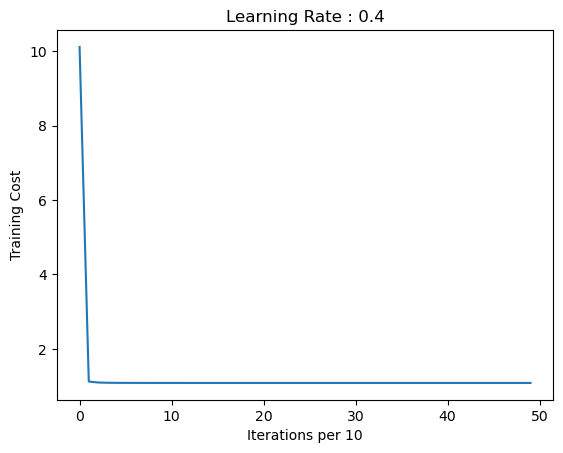

In [46]:
Linear_regression_model_training(xtraining,ytraining,xvalidation,yvalidation,0.4,500)

In [47]:
linear_regression = linear_model.LinearRegression()
model = linear_regression.fit(xtraining,ytraining)
predictions = linear_regression.predict(xvalidation)

In [48]:
temp = (1/yvalidation.shape[0]) * np.sum(np.abs(predictions-yvalidation))
temp2 = mean_squared_error(yvalidation,predictions)


# Model Training - Filling nan with Mean

In [49]:
df_without_null_values_mean = Concatdfs.copy()
df_without_null_values_mean['gender'] = df_without_null_values_mean['gender'].apply(lambda x: 1 if x == 'male' else 0 if x == 'female' else np.nan)
df_without_null_values_mean = df_without_null_values_mean.drop((df_without_null_values_mean[df_without_null_values_mean['filename'].isna()]).index)
age_order = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties', 'nineties']
df_without_null_values_mean['age'] = pd.Categorical(df_without_null_values_mean['age'], categories=age_order, ordered=True).codes
df_without_null_values_mean['age'][df_without_null_values_mean['age'] == -1] = np.nan

In [50]:
mean_of_age = df_without_null_values['age'].mean().round()
df_without_null_values_mean['age'].fillna(mean_of_age,inplace=True)
indices = df_without_null_values_mean[df_without_null_values_mean['f0_mean'].isna()]
nan_temp = indices.index
df_without_null_values_mean.drop(nan_temp,inplace = True)

In [51]:
standard_scaler = StandardScaler()
df_without_null_values_mean['tempo'] = df_without_null_values_mean['tempo'].apply(lambda x: eval(x)[0] if isinstance(x, str) and x.startswith('[') and x.endswith(']') else x)
numeric_columns = df_without_null_values_mean.select_dtypes(include=[np.number]).columns.tolist()
columns_found_to_be_normalised = [col for col in numeric_columns if col not in ['up_votes','down_votes','age','gender','accent']]
df_without_null_values_mean[columns_found_to_be_normalised] = standard_scaler.fit_transform(df_without_null_values_mean[columns_found_to_be_normalised])
columns_to_select = df_without_null_values_mean.columns[7:]
x = df_without_null_values_mean[columns_to_select]
y = df_without_null_values_mean['age']

Iteration No. 1
Training Cost : 11.224859839963223
Validation Cost : 2.929713525861116
Training Mean Abs Error (MAE) : 3.6075417755185897
Validation Mean Abs Error (MAE) : 0.4825760728167608
Training Mean Square Error (MSE) : 22.449719679926446
Validation Mean Square Error (MSE) : 1.4651009464216282
Iteration No. 2
Training Cost : 2.9999448673279514
Validation Cost : 1.3715290620607377
Training Mean Abs Error (MAE) : 1.977856050310026
Validation Mean Abs Error (MAE) : 0.3108470162310366
Training Mean Square Error (MSE) : 5.999889734655903
Validation Mean Square Error (MSE) : 0.685878844171064
Iteration No. 3
Training Cost : 1.334079318692349
Validation Cost : 0.8959127781994719
Training Mean Abs Error (MAE) : 1.2487110149398462
Validation Mean Abs Error (MAE) : 0.23841981962214054
Training Mean Square Error (MSE) : 2.668158637384698
Validation Mean Square Error (MSE) : 0.4480310609432265
Iteration No. 4
Training Cost : 0.8588893432034663
Validation Cost : 0.728277613663847
Training Mea

Iteration No. 36
Training Cost : 0.4579012075707987
Validation Cost : 0.4511980372422749
Training Mean Abs Error (MAE) : 0.5640033852408316
Validation Mean Abs Error (MAE) : 0.14004812477607012
Training Mean Square Error (MSE) : 0.9158024151415974
Validation Mean Square Error (MSE) : 0.22563662472525836
Iteration No. 37
Training Cost : 0.4567012746776906
Validation Cost : 0.4496999499670085
Training Mean Abs Error (MAE) : 0.5625660408308367
Validation Mean Abs Error (MAE) : 0.1396899184713357
Training Mean Square Error (MSE) : 0.9134025493553812
Validation Mean Square Error (MSE) : 0.22488745622620865
Iteration No. 38
Training Cost : 0.4555550491956698
Validation Cost : 0.4482695935083734
Training Mean Abs Error (MAE) : 0.5612044268559121
Validation Mean Abs Error (MAE) : 0.1393494157556596
Training Mean Square Error (MSE) : 0.9111100983913396
Validation Mean Square Error (MSE) : 0.22417215878065014
Iteration No. 39
Training Cost : 0.45445928018330783
Validation Cost : 0.44690318418872

Iteration No. 72
Training Cost : 0.4345500591811047
Validation Cost : 0.42294997281870905
Training Mean Abs Error (MAE) : 0.539005629427405
Validation Mean Abs Error (MAE) : 0.13353236056606355
Training Mean Square Error (MSE) : 0.8691001183622094
Validation Mean Square Error (MSE) : 0.21151023811570716
Iteration No. 73
Training Cost : 0.4342301374208156
Validation Cost : 0.4225955977616022
Training Mean Abs Error (MAE) : 0.5387052483254927
Validation Mean Abs Error (MAE) : 0.1334548126788837
Training Mean Square Error (MSE) : 0.8684602748416312
Validation Mean Square Error (MSE) : 0.21133302105097626
Iteration No. 74
Training Cost : 0.4339197763723069
Validation Cost : 0.4222534811334135
Training Mean Abs Error (MAE) : 0.5384122792638023
Validation Mean Abs Error (MAE) : 0.13337920663198616
Training Mean Square Error (MSE) : 0.8678395527446138
Validation Mean Square Error (MSE) : 0.2111619342224105
Iteration No. 75
Training Cost : 0.4336186201215047
Validation Cost : 0.421923125648623

Iteration No. 120
Training Cost : 0.425937041720411
Validation Cost : 0.41415118845558124
Training Mean Abs Error (MAE) : 0.5308862955971004
Validation Mean Abs Error (MAE) : 0.13161852934190396
Training Mean Square Error (MSE) : 0.851874083440822
Validation Mean Square Error (MSE) : 0.20711011257988726
Iteration No. 121
Training Cost : 0.4258454540414276
Validation Cost : 0.41406646213103393
Training Mean Abs Error (MAE) : 0.5307966996571728
Validation Mean Abs Error (MAE) : 0.13160307944215208
Training Mean Square Error (MSE) : 0.8516909080828552
Validation Mean Square Error (MSE) : 0.2070677423559096
Iteration No. 122
Training Cost : 0.4257559063251517
Validation Cost : 0.41398374635486945
Training Mean Abs Error (MAE) : 0.5307085457116092
Validation Mean Abs Error (MAE) : 0.13158810673242924
Training Mean Square Error (MSE) : 0.8515118126503034
Validation Mean Square Error (MSE) : 0.20702637757369702
Iteration No. 123
Training Cost : 0.42566834326897696
Validation Cost : 0.41390297

Iteration No. 157
Training Cost : 0.42357254567289326
Validation Cost : 0.41197098091334117
Training Mean Abs Error (MAE) : 0.5284753257595916
Validation Mean Abs Error (MAE) : 0.13118359108975783
Training Mean Square Error (MSE) : 0.8471450913457865
Validation Mean Square Error (MSE) : 0.20601982709451966
Iteration No. 158
Training Cost : 0.42353016214210054
Validation Cost : 0.4119309198019259
Training Mean Abs Error (MAE) : 0.528429503255172
Validation Mean Abs Error (MAE) : 0.13117504748646017
Training Mean Square Error (MSE) : 0.8470603242842011
Validation Mean Square Error (MSE) : 0.2059997931998296
Iteration No. 159
Training Cost : 0.42348859170660397
Validation Cost : 0.4118915271889132
Training Mean Abs Error (MAE) : 0.5283847436498225
Validation Mean Abs Error (MAE) : 0.13116654365405817
Training Mean Square Error (MSE) : 0.8469771834132079
Validation Mean Square Error (MSE) : 0.20598009361005826
Iteration No. 160
Training Cost : 0.42344781634212103
Validation Cost : 0.411852

Iteration No. 197
Training Cost : 0.4223691823917985
Validation Cost : 0.41076464218628694
Training Mean Abs Error (MAE) : 0.5270561973563302
Validation Mean Abs Error (MAE) : 0.13093655855455927
Training Mean Square Error (MSE) : 0.844738364783597
Validation Mean Square Error (MSE) : 0.20541655718600782
Iteration No. 198
Training Cost : 0.4223489279088583
Validation Cost : 0.4107423199129752
Training Mean Abs Error (MAE) : 0.5270317223823074
Validation Mean Abs Error (MAE) : 0.13093195354102807
Training Mean Square Error (MSE) : 0.8446978558177166
Validation Mean Square Error (MSE) : 0.20540539418885242
Iteration No. 199
Training Cost : 0.42232902949718737
Validation Cost : 0.4107202836872872
Training Mean Abs Error (MAE) : 0.5270077436628955
Validation Mean Abs Error (MAE) : 0.13092731743684685
Training Mean Square Error (MSE) : 0.8446580589943747
Validation Mean Square Error (MSE) : 0.20539437423935017
Iteration No. 200
Training Cost : 0.4223094804015243
Validation Cost : 0.41069852

Iteration No. 235
Training Cost : 0.4218020455106138
Validation Cost : 0.41008335684183855
Training Mean Abs Error (MAE) : 0.526379703066821
Validation Mean Abs Error (MAE) : 0.1307761475359842
Training Mean Square Error (MSE) : 0.8436040910212276
Validation Mean Square Error (MSE) : 0.20507585773054102
Iteration No. 236
Training Cost : 0.4217915789063772
Validation Cost : 0.4100692466818191
Training Mean Abs Error (MAE) : 0.5263679948552676
Validation Mean Abs Error (MAE) : 0.13077242032908076
Training Mean Square Error (MSE) : 0.8435831578127544
Validation Mean Square Error (MSE) : 0.20506880147448864
Iteration No. 237
Training Cost : 0.42178128963510564
Validation Cost : 0.410055296823556
Training Mean Abs Error (MAE) : 0.5263564458657976
Validation Mean Abs Error (MAE) : 0.13076876935845255
Training Mean Square Error (MSE) : 0.8435625792702113
Validation Mean Square Error (MSE) : 0.20506182538267512
Iteration No. 238
Training Cost : 0.4217711745868218
Validation Cost : 0.4100415051

Iteration No. 269
Training Cost : 0.4215294641889591
Validation Cost : 0.4096822277660346
Training Mean Abs Error (MAE) : 0.5260451036524761
Validation Mean Abs Error (MAE) : 0.1306772718137578
Training Mean Square Error (MSE) : 0.8430589283779182
Validation Mean Square Error (MSE) : 0.2048752597596439
Iteration No. 270
Training Cost : 0.4215235827219539
Validation Cost : 0.4096725542855835
Training Mean Abs Error (MAE) : 0.5260370392292356
Validation Mean Abs Error (MAE) : 0.13067475125557618
Training Mean Square Error (MSE) : 0.8430471654439078
Validation Mean Square Error (MSE) : 0.20487042221316062
Iteration No. 271
Training Cost : 0.4215177994864682
Validation Cost : 0.40966298493487996
Training Mean Abs Error (MAE) : 0.5260289920083666
Validation Mean Abs Error (MAE) : 0.1306722558353815
Training Mean Square Error (MSE) : 0.8430355989729365
Validation Mean Square Error (MSE) : 0.20486563674023
Iteration No. 272
Training Cost : 0.42151211281577855
Validation Cost : 0.4096535184679

Iteration No. 304
Training Cost : 0.4213725242464659
Validation Cost : 0.4093982868282037
Training Mean Abs Error (MAE) : 0.5258092814588948
Validation Mean Abs Error (MAE) : 0.13060473166765207
Training Mean Square Error (MSE) : 0.8427450484929317
Validation Mean Square Error (MSE) : 0.20473326562503935
Iteration No. 305
Training Cost : 0.42136925542470816
Validation Cost : 0.40939161703297583
Training Mean Abs Error (MAE) : 0.525803585984128
Validation Mean Abs Error (MAE) : 0.13060318275877664
Training Mean Square Error (MSE) : 0.8427385108494163
Validation Mean Square Error (MSE) : 0.2047299301715165
Iteration No. 306
Training Cost : 0.4213660408473187
Validation Cost : 0.409385016455945
Training Mean Abs Error (MAE) : 0.5257979145010427
Validation Mean Abs Error (MAE) : 0.1306016388259784
Training Mean Square Error (MSE) : 0.8427320816946374
Validation Mean Square Error (MSE) : 0.20472662933286132
Iteration No. 307
Training Cost : 0.4213628796079779
Validation Cost : 0.40937848431

Iteration No. 340
Training Cost : 0.42128336302862673
Validation Cost : 0.4091967265615361
Training Mean Abs Error (MAE) : 0.5256396496564965
Validation Mean Abs Error (MAE) : 0.13055702164419317
Training Mean Square Error (MSE) : 0.8425667260572535
Validation Mean Square Error (MSE) : 0.20463246869221674
Iteration No. 341
Training Cost : 0.42128157168476904
Validation Cost : 0.40919211835461083
Training Mean Abs Error (MAE) : 0.5256359335258534
Validation Mean Abs Error (MAE) : 0.1305558983381503
Training Mean Square Error (MSE) : 0.8425631433695381
Validation Mean Square Error (MSE) : 0.20463016420467287
Iteration No. 342
Training Cost : 0.42127980998408804
Validation Cost : 0.4091875564917805
Training Mean Abs Error (MAE) : 0.5256322847978051
Validation Mean Abs Error (MAE) : 0.1305547920909125
Training Mean Square Error (MSE) : 0.8425596199681761
Validation Mean Square Error (MSE) : 0.2046278828930391
Iteration No. 343
Training Cost : 0.4212780774346462
Validation Cost : 0.40918304

Iteration No. 368
Training Cost : 0.42124295439388987
Validation Cost : 0.40908367706604165
Training Mean Abs Error (MAE) : 0.5255523449873026
Validation Mean Abs Error (MAE) : 0.13053019539867428
Training Mean Square Error (MSE) : 0.8424859087877797
Validation Mean Square Error (MSE) : 0.20457593452210784
Iteration No. 369
Training Cost : 0.4212418314023822
Validation Cost : 0.4090801938440525
Training Mean Abs Error (MAE) : 0.5255497156023573
Validation Mean Abs Error (MAE) : 0.1305294323484355
Training Mean Square Error (MSE) : 0.8424836628047644
Validation Mean Square Error (MSE) : 0.20457419262079637
Iteration No. 370
Training Cost : 0.4212407269757627
Validation Cost : 0.40907674486030576
Training Mean Abs Error (MAE) : 0.5255471174472076
Validation Mean Abs Error (MAE) : 0.13052868894924646
Training Mean Square Error (MSE) : 0.8424814539515254
Validation Mean Square Error (MSE) : 0.2045724678414598
Iteration No. 371
Training Cost : 0.42123964080667675
Validation Cost : 0.4090733

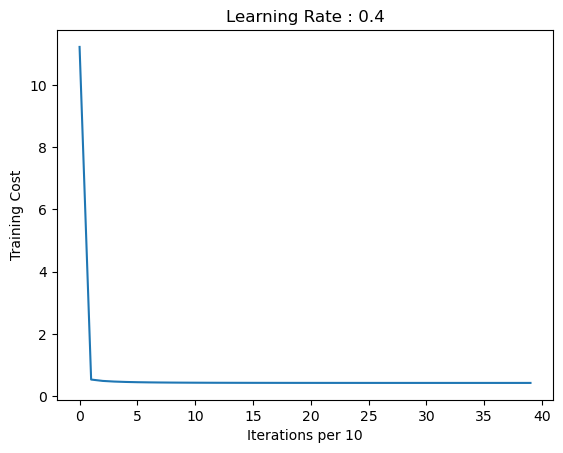

In [52]:
xtraining, xvalidation, ytraining, yvalidation = train_test_split(x, y, test_size=0.2, random_state=5, shuffle=True)
Linear_regression_model_training(xtraining,ytraining,xvalidation,yvalidation,0.4,400)

# Model Training - Filling nan with Mode

In [53]:
df_without_null_values_mode = Concatdfs.copy()
df_without_null_values_mode['gender'] = df_without_null_values_mode['gender'].apply(lambda x: 1 if x == 'male' else 0 if x == 'female' else np.nan)
df_without_null_values_mode = df_without_null_values_mode.drop((df_without_null_values_mode[df_without_null_values_mode['filename'].isna()]).index)
age_order = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties', 'nineties']
df_without_null_values_mode['age'] = pd.Categorical(df_without_null_values_mode['age'], categories=age_order, ordered=True).codes
df_without_null_values_mode['age'][df_without_null_values_mode['age'] == -1] = np.nan
mode_of_age = df_without_null_values_mode['age'].mode()
df_without_null_values_mode['age'].fillna(mode_of_age[0],inplace=True)
indices = df_without_null_values_mode[df_without_null_values_mode['f0_mean'].isna()]
nan_temp = indices.index
df_without_null_values_mode.drop(nan_temp,inplace = True)

In [54]:
standard_scaler = StandardScaler()
df_without_null_values_mode['tempo'] = df_without_null_values_mode['tempo'].apply(lambda x: eval(x)[0] if isinstance(x, str) and x.startswith('[') and x.endswith(']') else x)
numeric_columns = df_without_null_values_mode.select_dtypes(include=[np.number]).columns.tolist()
columns_found_to_be_normalised = [col for col in numeric_columns if col not in ['up_votes','down_votes','age','gender','accent']]
df_without_null_values_mode[columns_found_to_be_normalised] = standard_scaler.fit_transform(df_without_null_values_mode[columns_found_to_be_normalised])
columns_to_select = df_without_null_values_mode.columns[7:]
x = df_without_null_values_mode[columns_to_select]
y = df_without_null_values_mode['age']

Iteration No. 1
Training Cost : 12.656640532346492
Validation Cost : 2.1156473857007545
Training Mean Abs Error (MAE) : 3.5829611162309716
Validation Mean Abs Error (MAE) : 0.40351013787320217
Training Mean Square Error (MSE) : 25.313281064692983
Validation Mean Square Error (MSE) : 1.058000026188075
Iteration No. 2
Training Cost : 2.212859617919819
Validation Cost : 1.003563958172452
Training Mean Abs Error (MAE) : 1.6440443086525676
Validation Mean Abs Error (MAE) : 0.2509197589992227
Training Mean Square Error (MSE) : 4.425719235839638
Validation Mean Square Error (MSE) : 0.5018656233567855
Iteration No. 3
Training Cost : 1.0547153009549284
Validation Cost : 0.7392002736879666
Training Mean Abs Error (MAE) : 1.0118323188800644
Validation Mean Abs Error (MAE) : 0.1989988281075063
Training Mean Square Error (MSE) : 2.1094306019098568
Validation Mean Square Error (MSE) : 0.36966174713517247
Iteration No. 4
Training Cost : 0.7774485290381636
Validation Cost : 0.6608972597527036
Training

Iteration No. 33
Training Cost : 0.6195590392119603
Validation Cost : 0.6023958682884921
Training Mean Abs Error (MAE) : 0.7810317362331304
Validation Mean Abs Error (MAE) : 0.19750687364210393
Training Mean Square Error (MSE) : 1.2391180784239206
Validation Mean Square Error (MSE) : 0.3012481421679407
Iteration No. 34
Training Cost : 0.6192584571711626
Validation Cost : 0.6021681209269093
Training Mean Abs Error (MAE) : 0.7809410640885666
Validation Mean Abs Error (MAE) : 0.19747702353920304
Training Mean Square Error (MSE) : 1.2385169143423251
Validation Mean Square Error (MSE) : 0.3011342495050388
Iteration No. 35
Training Cost : 0.6189666741770868
Validation Cost : 0.6019458102470955
Training Mean Abs Error (MAE) : 0.780850920477083
Validation Mean Abs Error (MAE) : 0.19744670768638073
Training Mean Square Error (MSE) : 1.2379333483541737
Validation Mean Square Error (MSE) : 0.30102307563615377
Iteration No. 36
Training Cost : 0.6186830674821557
Validation Cost : 0.6017286019140574

Iteration No. 63
Training Cost : 0.6130143941534212
Validation Cost : 0.5972081093506802
Training Mean Abs Error (MAE) : 0.7784115784346012
Validation Mean Abs Error (MAE) : 0.19664915705546598
Training Mean Square Error (MSE) : 1.2260287883068424
Validation Mean Square Error (MSE) : 0.2986538303137258
Iteration No. 64
Training Cost : 0.6128566647483764
Validation Cost : 0.5970785319331378
Training Mean Abs Error (MAE) : 0.7783403696272218
Validation Mean Abs Error (MAE) : 0.19662398903080877
Training Mean Square Error (MSE) : 1.2257133294967528
Validation Mean Square Error (MSE) : 0.2985890308050364
Iteration No. 65
Training Cost : 0.6127017686994373
Validation Cost : 0.5969511081694169
Training Mean Abs Error (MAE) : 0.7782709869864661
Validation Mean Abs Error (MAE) : 0.19659895777008551
Training Mean Square Error (MSE) : 1.2254035373988745
Validation Mean Square Error (MSE) : 0.2985253083027589
Iteration No. 66
Training Cost : 0.6125496449173702
Validation Cost : 0.5968257965977605

Iteration No. 98
Training Cost : 0.6088622976655319
Validation Cost : 0.5937304686802524
Training Mean Abs Error (MAE) : 0.7765426568968132
Validation Mean Abs Error (MAE) : 0.19592960293137496
Training Mean Square Error (MSE) : 1.2177245953310638
Validation Mean Square Error (MSE) : 0.29691472012681397
Iteration No. 99
Training Cost : 0.6087769010928261
Validation Cost : 0.5936571675843811
Training Mean Abs Error (MAE) : 0.7765040215148515
Validation Mean Abs Error (MAE) : 0.1959126496930011
Training Mean Square Error (MSE) : 1.2175538021856522
Validation Mean Square Error (MSE) : 0.29687806346943546
Iteration No. 100
Training Cost : 0.6086929634771692
Validation Cost : 0.5935850264115947
Training Mean Abs Error (MAE) : 0.7764664205448385
Validation Mean Abs Error (MAE) : 0.19589582410885925
Training Mean Square Error (MSE) : 1.2173859269543383
Validation Mean Square Error (MSE) : 0.29684198687027574
Iteration No. 101
Training Cost : 0.6086104593239029
Validation Cost : 0.593514025932

Iteration No. 127
Training Cost : 0.6068952203190613
Validation Cost : 0.5920128477420333
Training Mean Abs Error (MAE) : 0.7757992466067608
Validation Mean Abs Error (MAE) : 0.1955209674536729
Training Mean Square Error (MSE) : 1.2137904406381226
Validation Mean Square Error (MSE) : 0.29605576649876647
Iteration No. 128
Training Cost : 0.6068433104129645
Validation Cost : 0.5919664895746757
Training Mean Abs Error (MAE) : 0.7757856209303092
Validation Mean Abs Error (MAE) : 0.19551033763835668
Training Mean Square Error (MSE) : 1.213686620825929
Validation Mean Square Error (MSE) : 0.29603258355126305
Iteration No. 129
Training Cost : 0.6067922814866576
Validation Cost : 0.5919208514455497
Training Mean Abs Error (MAE) : 0.7757734487962687
Validation Mean Abs Error (MAE) : 0.19549979152657931
Training Mean Square Error (MSE) : 1.2135845629733153
Validation Mean Square Error (MSE) : 0.29600976068288865
Iteration No. 130
Training Cost : 0.6067421184806674
Validation Cost : 0.59187592177

Iteration No. 178
Training Cost : 0.6051132613310132
Validation Cost : 0.5903668681012376
Training Mean Abs Error (MAE) : 0.7755701514768258
Validation Mean Abs Error (MAE) : 0.19512642813207606
Training Mean Square Error (MSE) : 1.2102265226620263
Validation Mean Square Error (MSE) : 0.29523263949053385
Iteration No. 179
Training Cost : 0.6050915382374337
Validation Cost : 0.5903457768987892
Training Mean Abs Error (MAE) : 0.7755715126023299
Validation Mean Abs Error (MAE) : 0.1951205326265792
Training Mean Square Error (MSE) : 1.2101830764748673
Validation Mean Square Error (MSE) : 0.29522209213141654
Iteration No. 180
Training Cost : 0.6050701825234437
Validation Cost : 0.5903250043578602
Training Mean Abs Error (MAE) : 0.7755728588691727
Validation Mean Abs Error (MAE) : 0.1951146851674856
Training Mean Square Error (MSE) : 1.2101403650468874
Validation Mean Square Error (MSE) : 0.2952117041296184
Iteration No. 181
Training Cost : 0.605049187963352
Validation Cost : 0.5903045454889

Iteration No. 226
Training Cost : 0.6043951314857414
Validation Cost : 0.5896412313950941
Training Mean Abs Error (MAE) : 0.7756660123229092
Validation Mean Abs Error (MAE) : 0.19489622563637662
Training Mean Square Error (MSE) : 1.2087902629714828
Validation Mean Square Error (MSE) : 0.29486976065765663
Iteration No. 227
Training Cost : 0.6043855467919708
Validation Cost : 0.589630971620308
Training Mean Abs Error (MAE) : 0.7756678347778211
Validation Mean Abs Error (MAE) : 0.19489244542430828
Training Mean Square Error (MSE) : 1.2087710935839415
Validation Mean Square Error (MSE) : 0.29486462991513984
Iteration No. 228
Training Cost : 0.604376124017802
Validation Cost : 0.5896208623717025
Training Mean Abs Error (MAE) : 0.77566964705514
Validation Mean Abs Error (MAE) : 0.1948886968543354
Training Mean Square Error (MSE) : 1.208752248035604
Validation Mean Square Error (MSE) : 0.2948595744482593
Iteration No. 229
Training Cost : 0.6043668604255994
Validation Cost : 0.589610901340114


Iteration No. 255
Training Cost : 0.6041739249888552
Validation Cost : 0.589397174232068
Training Mean Abs Error (MAE) : 0.7757195845707543
Validation Mean Abs Error (MAE) : 0.19480522645582474
Training Mean Square Error (MSE) : 1.2083478499777105
Validation Mean Square Error (MSE) : 0.29474771173465647
Iteration No. 256
Training Cost : 0.6041680766667274
Validation Cost : 0.5893904625170864
Training Mean Abs Error (MAE) : 0.7757212825091184
Validation Mean Abs Error (MAE) : 0.194802525239631
Training Mean Square Error (MSE) : 1.208336153333455
Validation Mean Square Error (MSE) : 0.29474435531776283
Iteration No. 257
Training Cost : 0.6041623271105789
Validation Cost : 0.5893838472278279
Training Mean Abs Error (MAE) : 0.7757229647047296
Validation Mean Abs Error (MAE) : 0.19479984674585413
Training Mean Square Error (MSE) : 1.2083246542211579
Validation Mean Square Error (MSE) : 0.2947410471217676
Iteration No. 258
Training Cost : 0.6041566746515475
Validation Cost : 0.58937732690560

Iteration No. 285
Training Cost : 0.6040353728578631
Validation Cost : 0.5892324223500308
Training Mean Abs Error (MAE) : 0.7757642540112607
Validation Mean Abs Error (MAE) : 0.19473349982295082
Training Mean Square Error (MSE) : 1.2080707457157263
Validation Mean Square Error (MSE) : 0.2946653220620257
Iteration No. 286
Training Cost : 0.6040318641283512
Validation Cost : 0.5892280523105053
Training Mean Abs Error (MAE) : 0.7757655401375821
Validation Mean Abs Error (MAE) : 0.19473151191301805
Training Mean Square Error (MSE) : 1.2080637282567024
Validation Mean Square Error (MSE) : 0.29466313667803234
Iteration No. 287
Training Cost : 0.6040284146395807
Validation Cost : 0.5892237435305897
Training Mean Abs Error (MAE) : 0.7757668144780081
Validation Mean Abs Error (MAE) : 0.1947295407763536
Training Mean Square Error (MSE) : 1.2080568292791614
Validation Mean Square Error (MSE) : 0.2946609819289497
Iteration No. 288
Training Cost : 0.6040250233909331
Validation Cost : 0.589219495099

Iteration No. 342
Training Cost : 0.6039062838151329
Validation Cost : 0.5890591910654913
Training Mean Abs Error (MAE) : 0.7758216242668173
Validation Mean Abs Error (MAE) : 0.19464328837348288
Training Mean Square Error (MSE) : 1.2078125676302658
Validation Mean Square Error (MSE) : 0.29457869198140924
Iteration No. 343
Training Cost : 0.603904954275334
Validation Cost : 0.5890571961154247
Training Mean Abs Error (MAE) : 0.7758223882731934
Validation Mean Abs Error (MAE) : 0.19464206367122913
Training Mean Square Error (MSE) : 1.207809908550668
Validation Mean Square Error (MSE) : 0.2945776943401024
Iteration No. 344
Training Cost : 0.6039036471754926
Validation Cost : 0.5890552276619887
Training Mean Abs Error (MAE) : 0.7758231453734888
Validation Mean Abs Error (MAE) : 0.19464084935680215
Training Mean Square Error (MSE) : 1.2078072943509852
Validation Mean Square Error (MSE) : 0.2945767099493192
Iteration No. 345
Training Cost : 0.6039023621367475
Validation Cost : 0.5890532853266

Iteration No. 375
Training Cost : 0.6038724283078217
Validation Cost : 0.5890054967748877
Training Mean Abs Error (MAE) : 0.7758435132991564
Validation Mean Abs Error (MAE) : 0.19460790903378059
Training Mean Square Error (MSE) : 1.2077448566156435
Validation Mean Square Error (MSE) : 0.2945518403608373
Iteration No. 376
Training Cost : 0.6038716701368695
Validation Cost : 0.5890042041784406
Training Mean Abs Error (MAE) : 0.7758440798785401
Validation Mean Abs Error (MAE) : 0.19460698466856494
Training Mean Square Error (MSE) : 1.207743340273739
Validation Mean Square Error (MSE) : 0.29455119395487944
Iteration No. 377
Training Cost : 0.6038709247600909
Validation Cost : 0.5890029281689791
Training Mean Abs Error (MAE) : 0.775844641359073
Validation Mean Abs Error (MAE) : 0.1946060681570345
Training Mean Square Error (MSE) : 1.2077418495201817
Validation Mean Square Error (MSE) : 0.29455055584379686
Iteration No. 378
Training Cost : 0.6038701919615188
Validation Cost : 0.5890016685162

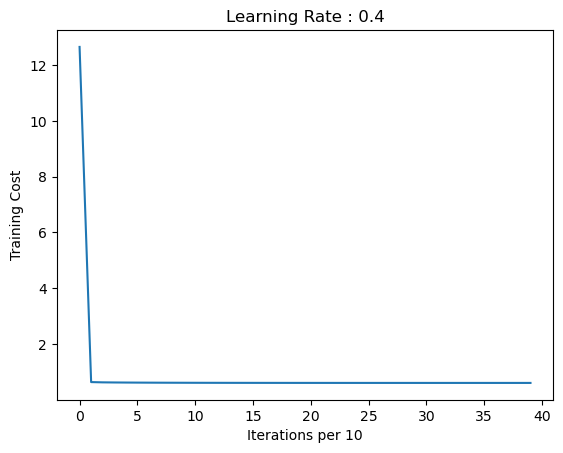

In [55]:
xtraining, xvalidation, ytraining, yvalidation = train_test_split(x, y, test_size=0.2, random_state=5, shuffle=True)
Linear_regression_model_training(xtraining,ytraining,xvalidation,yvalidation,0.4,400)

# Model Training - Filling nan with Median

In [56]:
df_without_null_values_median = Concatdfs.copy()
df_without_null_values_median['gender'] = df_without_null_values_median['gender'].apply(lambda x: 1 if x == 'male' else 0 if x == 'female' else np.nan)
df_without_null_values_median = df_without_null_values_median.drop((df_without_null_values_median[df_without_null_values_median['filename'].isna()]).index)
age_order = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties', 'nineties']
df_without_null_values_median['age'] = pd.Categorical(df_without_null_values_median['age'], categories=age_order, ordered=True).codes
df_without_null_values_median['age'][df_without_null_values_median['age'] == -1] = np.nan
median_of_age = df_without_null_values_median['age'].median()

In [57]:
df_without_null_values_median['age'].fillna(median_of_age,inplace=True)
indices = df_without_null_values_median[df_without_null_values_median['f0_mean'].isna()]
nan_temp = indices.index
df_without_null_values_median.drop(nan_temp,inplace = True)
standard_scaler = StandardScaler()
df_without_null_values_median['tempo'] = df_without_null_values_median['tempo'].apply(lambda x: eval(x)[0] if isinstance(x, str) and x.startswith('[') and x.endswith(']') else x)
numeric_columns = df_without_null_values_median.select_dtypes(include=[np.number]).columns.tolist()
columns_found_to_be_normalised = [col for col in numeric_columns if col not in ['up_votes','down_votes','age','gender','accent']]
df_without_null_values_median[columns_found_to_be_normalised] = standard_scaler.fit_transform(df_without_null_values_median[columns_found_to_be_normalised])

In [58]:
columns_to_select = df_without_null_values_median.columns[7:]
x = df_without_null_values_median[columns_to_select]
y = df_without_null_values_median['age']

Iteration No. 1
Training Cost : 13.89587387936415
Validation Cost : 3.5879256449264143
Training Mean Abs Error (MAE) : 4.345242245222674
Validation Mean Abs Error (MAE) : 0.5207981410631873
Training Mean Square Error (MSE) : 27.7917477587283
Validation Mean Square Error (MSE) : 1.7942618661075584
Iteration No. 2
Training Cost : 3.5397269557515303
Validation Cost : 1.5761764763719415
Training Mean Abs Error (MAE) : 2.0834440516331063
Validation Mean Abs Error (MAE) : 0.3331848746915319
Training Mean Square Error (MSE) : 7.079453911503061
Validation Mean Square Error (MSE) : 0.7882196081206575
Iteration No. 3
Training Cost : 1.5638592644769405
Validation Cost : 1.0175613684964335
Training Mean Abs Error (MAE) : 1.336687020761596
Validation Mean Abs Error (MAE) : 0.25247968333400056
Training Mean Square Error (MSE) : 3.127718528953881
Validation Mean Square Error (MSE) : 0.5088654951640774
Iteration No. 4
Training Cost : 0.9927569824326096
Validation Cost : 0.8034276933880637
Training Mea

Iteration No. 38
Training Cost : 0.4814442857372467
Validation Cost : 0.47284255121500834
Training Mean Abs Error (MAE) : 0.616827945102139
Validation Mean Abs Error (MAE) : 0.15310999496061445
Training Mean Square Error (MSE) : 0.9628885714744934
Validation Mean Square Error (MSE) : 0.23646068572179116
Iteration No. 39
Training Cost : 0.48024548337752326
Validation Cost : 0.47160252830407473
Training Mean Abs Error (MAE) : 0.6151849403468472
Validation Mean Abs Error (MAE) : 0.15272195655662957
Training Mean Square Error (MSE) : 0.9604909667550465
Validation Mean Square Error (MSE) : 0.23584057091385635
Iteration No. 40
Training Cost : 0.4790793193222781
Validation Cost : 0.4703969888591473
Training Mean Abs Error (MAE) : 0.6135854738017524
Validation Mean Abs Error (MAE) : 0.15234570470701167
Training Mean Square Error (MSE) : 0.9581586386445562
Validation Mean Square Error (MSE) : 0.23523770071302583
Iteration No. 41
Training Cost : 0.47794416624752906
Validation Cost : 0.4692243028

Iteration No. 76
Training Cost : 0.45096587685008305
Validation Cost : 0.4417168391039892
Training Mean Abs Error (MAE) : 0.5746609391412887
Validation Mean Abs Error (MAE) : 0.14281408927572994
Training Mean Square Error (MSE) : 0.9019317537001661
Validation Mean Square Error (MSE) : 0.22089523542456535
Iteration No. 77
Training Cost : 0.45044515352750325
Validation Cost : 0.4411923232684964
Training Mean Abs Error (MAE) : 0.573922744302338
Validation Mean Abs Error (MAE) : 0.1426243450271349
Training Mean Square Error (MSE) : 0.9008903070550065
Validation Mean Square Error (MSE) : 0.22063293378987983
Iteration No. 78
Training Cost : 0.44993428481959385
Validation Cost : 0.44067782672257727
Training Mean Abs Error (MAE) : 0.5731956706334083
Validation Mean Abs Error (MAE) : 0.14243793073891745
Training Mean Square Error (MSE) : 0.8998685696391877
Validation Mean Square Error (MSE) : 0.22037564263506113
Iteration No. 79
Training Cost : 0.44943304926130284
Validation Cost : 0.4401731045

Iteration No. 103
Training Cost : 0.43981620883400135
Validation Cost : 0.43047247971118424
Training Mean Abs Error (MAE) : 0.5580913083683843
Validation Mean Abs Error (MAE) : 0.13864821053675946
Training Mean Square Error (MSE) : 0.8796324176680027
Validation Mean Square Error (MSE) : 0.2152721185420158
Iteration No. 104
Training Cost : 0.43949945622966685
Validation Cost : 0.4301510805517407
Training Mean Abs Error (MAE) : 0.5575908519210787
Validation Mean Abs Error (MAE) : 0.13852748343238608
Training Mean Square Error (MSE) : 0.8789989124593337
Validation Mean Square Error (MSE) : 0.21511139217456612
Iteration No. 105
Training Cost : 0.4391883065074849
Validation Cost : 0.4298351382577728
Training Mean Abs Error (MAE) : 0.5570966760946524
Validation Mean Abs Error (MAE) : 0.1384082231382133
Training Mean Square Error (MSE) : 0.8783766130149698
Validation Mean Square Error (MSE) : 0.21495339469466887
Iteration No. 106
Training Cost : 0.4388826514421669
Validation Cost : 0.42952454

Iteration No. 152
Training Cost : 0.4293060450968657
Validation Cost : 0.4195615452759019
Training Mean Abs Error (MAE) : 0.5401188187524927
Validation Mean Abs Error (MAE) : 0.13437366491212704
Training Mean Square Error (MSE) : 0.8586120901937314
Validation Mean Square Error (MSE) : 0.20981574192827232
Iteration No. 153
Training Cost : 0.42917067412564386
Validation Cost : 0.41941496374632425
Training Mean Abs Error (MAE) : 0.5398644179362799
Validation Mean Abs Error (MAE) : 0.13431359972982354
Training Mean Square Error (MSE) : 0.8583413482512877
Validation Mean Square Error (MSE) : 0.20974243894631983
Iteration No. 154
Training Cost : 0.42903758530441705
Validation Cost : 0.41927058417271107
Training Mean Abs Error (MAE) : 0.5396132861615286
Validation Mean Abs Error (MAE) : 0.13425456972148953
Training Mean Square Error (MSE) : 0.8580751706088341
Validation Mean Square Error (MSE) : 0.2096702371258765
Iteration No. 155
Training Cost : 0.4289067390139696
Validation Cost : 0.419128

Iteration No. 191
Training Cost : 0.42540816505734685
Validation Cost : 0.4151892345415043
Training Mean Abs Error (MAE) : 0.5326876714843646
Validation Mean Abs Error (MAE) : 0.13253489746837213
Training Mean Square Error (MSE) : 0.8508163301146937
Validation Mean Square Error (MSE) : 0.207629222141109
Iteration No. 192
Training Cost : 0.425338070250196
Validation Cost : 0.4151065334121356
Training Mean Abs Error (MAE) : 0.5325521629033347
Validation Mean Abs Error (MAE) : 0.1324993209598992
Training Mean Square Error (MSE) : 0.850676140500392
Validation Mean Square Error (MSE) : 0.20758786468351506
Iteration No. 193
Training Cost : 0.4252691417687112
Validation Cost : 0.41502500194127917
Training Mean Abs Error (MAE) : 0.5324183810047598
Validation Mean Abs Error (MAE) : 0.1324641538481097
Training Mean Square Error (MSE) : 0.8505382835374224
Validation Mean Square Error (MSE) : 0.20754709215266504
Iteration No. 194
Training Cost : 0.42520135997727815
Validation Cost : 0.414944622019

Iteration No. 218
Training Cost : 0.423873045914286
Validation Cost : 0.4133188585794245
Training Mean Abs Error (MAE) : 0.5297109349892333
Validation Mean Abs Error (MAE) : 0.1317538001028795
Training Mean Square Error (MSE) : 0.847746091828572
Validation Mean Square Error (MSE) : 0.20669387826942384
Iteration No. 219
Training Cost : 0.42382844359683197
Validation Cost : 0.4132621900723405
Training Mean Abs Error (MAE) : 0.5296236340780823
Validation Mean Abs Error (MAE) : 0.13173097714404616
Training Mean Square Error (MSE) : 0.8476568871936639
Validation Mean Square Error (MSE) : 0.20666553929271905
Iteration No. 220
Training Cost : 0.42378458047002904
Validation Cost : 0.41320629527053715
Training Mean Abs Error (MAE) : 0.5295375487382857
Validation Mean Abs Error (MAE) : 0.13170846094186667
Training Mean Square Error (MSE) : 0.8475691609400581
Validation Mean Square Error (MSE) : 0.20663758723314077
Iteration No. 221
Training Cost : 0.4237414442083108
Validation Cost : 0.413151162

Iteration No. 256
Training Cost : 0.4226075649625672
Validation Cost : 0.41162433273761645
Training Mean Abs Error (MAE) : 0.5272816571489912
Validation Mean Abs Error (MAE) : 0.13114393625835943
Training Mean Square Error (MSE) : 0.8452151299251344
Validation Mean Square Error (MSE) : 0.20584647411449397
Iteration No. 257
Training Cost : 0.4225839077322119
Validation Cost : 0.4115903138184232
Training Mean Abs Error (MAE) : 0.5272393812509619
Validation Mean Abs Error (MAE) : 0.13113325241738227
Training Mean Square Error (MSE) : 0.8451678154644238
Validation Mean Square Error (MSE) : 0.20582946181951486
Iteration No. 258
Training Cost : 0.42256064155990325
Validation Cost : 0.41155673758797423
Training Mean Abs Error (MAE) : 0.5271977450979479
Validation Mean Abs Error (MAE) : 0.13112273174571842
Training Mean Square Error (MSE) : 0.8451212831198065
Validation Mean Square Error (MSE) : 0.20581267090580477
Iteration No. 259
Training Cost : 0.42253775996575227
Validation Cost : 0.41152

Iteration No. 299
Training Cost : 0.42187520933499795
Validation Cost : 0.41049389099111133
Training Mean Abs Error (MAE) : 0.5261009055854666
Validation Mean Abs Error (MAE) : 0.1308014678496242
Training Mean Square Error (MSE) : 0.8437504186699959
Validation Mean Square Error (MSE) : 0.20528115902205935
Iteration No. 300
Training Cost : 0.42186365124887004
Validation Cost : 0.4104742271257946
Training Mean Abs Error (MAE) : 0.5260842799129523
Validation Mean Abs Error (MAE) : 0.13079597061106205
Training Mean Square Error (MSE) : 0.8437273024977401
Validation Mean Square Error (MSE) : 0.20527132545047239
Iteration No. 301
Training Cost : 0.421852284010828
Validation Cost : 0.41045480521686534
Training Mean Abs Error (MAE) : 0.5260679708386191
Validation Mean Abs Error (MAE) : 0.13079055382860838
Training Mean Square Error (MSE) : 0.843704568021656
Validation Mean Square Error (MSE) : 0.20526161287724556
Iteration No. 302
Training Cost : 0.4218411044668996
Validation Cost : 0.41043562

Iteration No. 345
Training Cost : 0.421500644133429
Validation Cost : 0.4097967430723751
Training Mean Abs Error (MAE) : 0.5256079810731548
Validation Mean Abs Error (MAE) : 0.13062441929512825
Training Mean Square Error (MSE) : 0.843001288266858
Validation Mean Square Error (MSE) : 0.20493252695734712
Iteration No. 346
Training Cost : 0.4214952696199402
Validation Cost : 0.40978542685649993
Training Mean Abs Error (MAE) : 0.5256013282409202
Validation Mean Abs Error (MAE) : 0.13062169806721693
Training Mean Square Error (MSE) : 0.8429905392398804
Validation Mean Square Error (MSE) : 0.20492686790623435
Iteration No. 347
Training Cost : 0.4214899838152381
Validation Cost : 0.409774241506722
Training Mean Abs Error (MAE) : 0.5255948300777514
Validation Mean Abs Error (MAE) : 0.13061899730449722
Training Mean Square Error (MSE) : 0.8429799676304762
Validation Mean Square Error (MSE) : 0.20492127429907753
Iteration No. 348
Training Cost : 0.4214847852547275
Validation Cost : 0.40976318533

Iteration No. 379
Training Cost : 0.4213599312855055
Validation Cost : 0.40947631546511365
Training Mean Abs Error (MAE) : 0.5254392993054112
Validation Mean Abs Error (MAE) : 0.130551063902624
Training Mean Square Error (MSE) : 0.842719862571011
Validation Mean Square Error (MSE) : 0.20477228644696466
Iteration No. 380
Training Cost : 0.4213568791684237
Validation Cost : 0.4094686288276363
Training Mean Abs Error (MAE) : 0.5254357746488988
Validation Mean Abs Error (MAE) : 0.130549420767289
Training Mean Square Error (MSE) : 0.8427137583368474
Validation Mean Square Error (MSE) : 0.2047684424875661
Iteration No. 381
Training Cost : 0.42135387742215913
Validation Cost : 0.40946102710741356
Training Mean Abs Error (MAE) : 0.5254323033275754
Validation Mean Abs Error (MAE) : 0.13054779019402563
Training Mean Square Error (MSE) : 0.8427077548443183
Validation Mean Square Error (MSE) : 0.20476464099387243
Iteration No. 382
Training Cost : 0.42135092521530293
Validation Cost : 0.40945350925

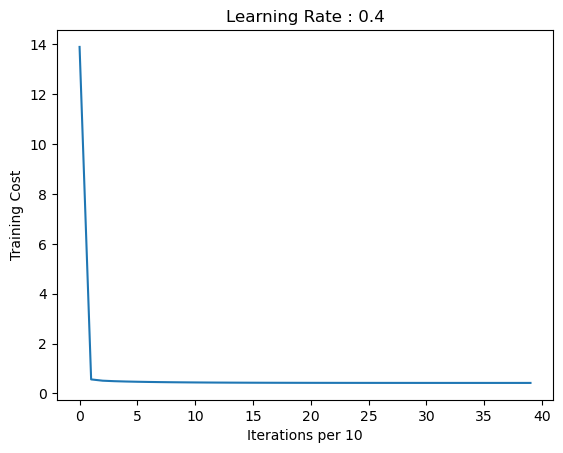

In [ ]:
xtraining, xvalidation, ytraining, yvalidation = train_test_split(x, y, test_size=0.2, random_state=5, shuffle=True)
Linear_regression_model_training(xtraining,ytraining,xvalidation,yvalidation,0.4,400)